# Analysis of Obesity and Overweight Across Different Countries
#### By Jason Werneth

# Introduction
As many people already know, there is currently an obesity epidemic occurring both in America and on an international level. To learn more about obesity and overweight and what both mean, you can visit https://www.cdc.gov/obesity/about-obesity/index.html.
Essentially, though, obesity can cause various health problems in people, thus the large proportion of people that are obese currently is concerning. The aim of this project is to see if it is currently still a problem or if the trend seems like it is already reversing. Another aim of the project, after seeing the extent to which obesity is currently an issue, is to see which variables from our data set have a correlation with the percentage of people in a population with obesity. While correlation doesn't necessarily imply causation, increasing variables positively correlated with the obesity rate and decreasing variables negatively correlated with the obesity rate may help the issue. We can then also use these correlations to set goals and figure out how the US, among other countries, can work towards resolving obesity.
The variables in our data set include the percentages of adults that perform varying amounts of different physical activities, and percentages of adults that consume <1 fruit/vegetable per day. Many people know that a change in diet and activity level can lead to weight loss, but I would like to see exactly how indicative a country's diet and activity level is of its population's obesity rate, to see if these variables are worth trying to change. At the end of the project, we will create models and use them to attempt to predict how obesity rates might change in the future assuming all variables remain constant (in reality, they likely won't, but this can show how variables other than the ones we are looking at might affect the population if we don't make progress in our variables). We will also observe how making a good change (as defined by our linear regressions/plots, for lowering obesity rates) in our variables over time could change obesity rates.
To do all this, we will be using the data science lifecycle inside of a Jupyter Notebook with Python. 
To learn more about python, you can visit https://docs.python.org
To learn more about Jupyter Notebooks, you can visit https://jupyter.org/

The steps of the data science lifecycle are below:
1. [Data Collection](#Data-Collection)
2. [Data Processing & Cleaning](#Data-Processing-&-Cleaning)
3. [Exploratory Analysis & Data Visualization](#Exploratory-Analysis-&-Data-Visualization)
4. [Hypothesis Testing & Machine Learning](#Hypothesis-Testing-&-Machine-Learning)
5. [Insight & Policy Decision](#Insight-&-Policy-Decision)

Before we get started, we'll need to import some python libraries. You'll see how each of these work throughout the course of the project.

In [315]:
# For storing data and performing operations on it
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For linear regression
from sklearn.linear_model import LinearRegression, SGDRegressor

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import statsmodels.formula.api as smf
from statsmodels.api import add_constant

# For loss functions
from sklearn.metrics import mean_squared_log_error

# Data Collection
In this section and then next (processing & cleaning), we'll be mostly just using pandas functions. We shall start off the process of data science with gathering our data. Fortunately for us, data.gov provides information from the last ~10 years about the obesity rates, activity rates, and diet of various demographics around the world. The dataset that we will use is from https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system. Start off by downloading the Comma Separated Values File (CSV) from the page and putting it into the same folder as your notebook for easy access. Using pandas, we can directly read this csv into a dataframe. This step will overall be pretty short since we now have the csv.
If you would like to learn more about pandas, you can look at the official documentation: https://pandas.pydata.org/

In [316]:
df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

df.head()

YearStart  YearEnd LocationAbbr LocationDesc  \
0       2020     2020           US     National   
1       2014     2014           GU         Guam   
2       2013     2013           US     National   
3       2013     2013           US     National   
4       2015     2015           US     National   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System        Physical Activity   
1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System        Physical Activity   

                          Topic  \
0  Physical Activity - Behavior   
1       Obesity / Weight Status   
2       Obesity / Weight Status   
3       Obesity / Weight Status   
4  Physical Activity - Behavior   

                                            Question  Data_Value_Unit  \
0  Percent of adults who engage in no leisure-tim...              NaN   
1  Percent of adults aged 18 years and older who ...              NaN   
2  Percent of adults aged 18 years and older who ...              NaN   
3  Percent of adults aged 18 years and older who ...              NaN   
4  Percent of adults who achieve at least 300 min...              NaN   

  Data_Value_Type  ...              GeoLocation  ClassID TopicID QuestionID  \
0           Value  ...                      NaN       PA     PA1       Q047   
1           Value  ...  (13.444304, 144.793731)      OWS    OWS1       Q036   
2           Value  ...                      NaN      OWS    OWS1       Q036   
3           Value  ...                      NaN      OWS    OWS1       Q037   
4           Value  ...                      NaN       PA     PA1       Q045   

   DataValueTypeID  LocationID  StratificationCategory1       Stratification1  \
0            VALUE          59           Race/Ethnicity              Hispanic   
1            VALUE          66                Education  High school graduate   
2            VALUE          59                   Income     $50,000 - $74,999   
3            VALUE          59                   Income     Data not reported   
4            VALUE          59                   Income     Less than $15,000   

  StratificationCategoryId1 StratificationID1  
0                      RACE           RACEHIS  
1                       EDU         EDUHSGRAD  
2                       INC           INC5075  
3                       INC             INCNR  
4                       INC         INCLESS15  

[5 rows x 33 columns]

# Data Processing & Cleaning
As you can see from the above table, the data is very messy and has so many columns that it doesn't even display them all (that's what the ... is)! In this section, we'll start off by dropping all of the columns that we won't use and then tidying the data to make it more organized. Essentially, the goal of data processing & cleaning is to get the data into a state where we can perform operations on it in data analysis & visualization, and easily create a model from it.
We'll start off by dropping the columns that we will definetly not be using. We have the variables that the IDs indicate already, so we can drop the IDs. Additionally, we don't need Class or Topic, because we can easily gather that from the question itself. We can drop Total because it repeats information from StatificationCategory1/Straification1. Geolocation we don't need either since we already have LocationAbbr/LocationDesc. We will also not use Sample_Size, Low_Confidence_Limit, and High_Confidence_Limit for simplicity. Lastly, we simply will not be using the footnote variables or datasource.

In [317]:
# Drop unnecessary columns
df = df.drop(["ClassID", "TopicID", "QuestionID", "DataValueTypeID", "LocationID",
                  "StratificationID1", "Data_Value_Footnote_Symbol", "Data_Value_Footnote",
                 "Datasource", "StratificationCategoryId1", "Class", "Topic", "Low_Confidence_Limit",
                 "High_Confidence_Limit ", "GeoLocation", "Sample_Size", "Total"], axis=1)

df.head()

YearStart  YearEnd LocationAbbr LocationDesc  \
0       2020     2020           US     National   
1       2014     2014           GU         Guam   
2       2013     2013           US     National   
3       2013     2013           US     National   
4       2015     2015           US     National   

                                            Question  Data_Value_Unit  \
0  Percent of adults who engage in no leisure-tim...              NaN   
1  Percent of adults aged 18 years and older who ...              NaN   
2  Percent of adults aged 18 years and older who ...              NaN   
3  Percent of adults aged 18 years and older who ...              NaN   
4  Percent of adults who achieve at least 300 min...              NaN   

  Data_Value_Type  Data_Value  Data_Value_Alt Age(years)  \
0           Value        30.6            30.6        NaN   
1           Value        29.3            29.3        NaN   
2           Value        28.8            28.8        NaN   
3           Value        32.7            32.7        NaN   
4           Value        26.6            26.6        NaN   

              Education Gender             Income Race/Ethnicity  \
0                   NaN    NaN                NaN       Hispanic   
1  High school graduate    NaN                NaN            NaN   
2                   NaN    NaN  $50,000 - $74,999            NaN   
3                   NaN    NaN  Data not reported            NaN   
4                   NaN    NaN  Less than $15,000            NaN   

  StratificationCategory1       Stratification1  
0          Race/Ethnicity              Hispanic  
1               Education  High school graduate  
2                  Income     $50,000 - $74,999  
3                  Income     Data not reported  
4                  Income     Less than $15,000

Alright, that looks a bit cleaner now, and we can see every column! But now that we can see them all, we can start noticing that some of them don't look particularly useful because of having many NaN values in the head. However, we can't conclude that these will be NaN and useless in every row from just looking at the first 5 rows. We'll check using pandas functions to make sure that we should be dropping these columns.

In [318]:
# Check if both YearStart and YearEnd are necessary by seeing if they're always the same
print("Number of rows where YearStart and YearEnd are different:", len(df[df["YearStart"] != df["YearEnd"]]))

# Every row of the dfset has a YearStart that is equal to YearEnd, so we can replace both of those
# columns with one column called "Year"
df["Year"] = df["YearStart"]
df = df.drop(["YearStart", "YearEnd"], axis=1)

# Drop Age(years), Education, Gender, Income, Race/Ethnicity because only one of them is specified per
# row, and which one that is and its value are specified by StratificationCategory1 and Statification1
df = df.drop(["Age(years)", "Education", "Gender", "Income", "Race/Ethnicity"], axis=1)

print("------- Questions -------")
# Let's find out what the exact pool of questions is
for i, row in df.drop_duplicates(subset=["Question"]).iterrows():
    print(row["Question"])

# All of the questions ask for percent, so we can drop the Data_Value_Unit and every Data_Value_Type is "Value"
# so we can also drop that.
df = df.drop(["Data_Value_Unit"], axis=1)

# It seems like every Data_Value_Type is "Value", so let's test that to see if we can drop that
print("Number of rows where Data_Value_Type isn't equal to Value:", len(df[df["Data_Value_Type"] != "Value"]))

# There are 0 rows where Data_Value_Type is something other than "Value", so let's drop it
df = df.drop(["Data_Value_Type"], axis=1)

Number of rows where YearStart and YearEnd are different: 0
------- Questions -------
Percent of adults who engage in no leisure-time physical activity
Percent of adults aged 18 years and older who have obesity
Percent of adults aged 18 years and older who have an overweight classification
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Percent of adults who engage in muscle-strengthening activities on 2

We will consider only using Data_Value, and not using Data_Value_Alt, but we first need to make sure we have a Data_Value in each row where there is a Data_Value_Alt, otherwise we will need to use Data_Value_Alt.

In [319]:
# Let's first check how many NaN Data_Values there are
print("Number of NaN Data_Values", len(df.loc[lambda x: np.isnan(x["Data_Value"])]))
# Wow! 8778 is a lot of NaN Data_Values, we should check if any of those have a Data_Value_Alt

# Using bitwise & and ~ because they are overloaded to be "and" and "not"
print("Number of NaN Data_Values where Data_Value_Alt is not NaN:", len(df.loc[lambda x: np.isnan(x["Data_Value"]) &
                                                                               ~np.isnan(x["Data_Value_Alt"])]))

# Since there are no rows where Data_Value is NaN and Data_Value_Alt isn't NaN, we will drop Data_Value_alt for
# simplicity
df = df.drop(["Data_Value_Alt"], axis=1)

df.head()

Number of NaN Data_Values 8778
Number of NaN Data_Values where Data_Value_Alt is not NaN: 0


LocationAbbr LocationDesc  \
0           US     National   
1           GU         Guam   
2           US     National   
3           US     National   
4           US     National   

                                            Question  Data_Value  \
0  Percent of adults who engage in no leisure-tim...        30.6   
1  Percent of adults aged 18 years and older who ...        29.3   
2  Percent of adults aged 18 years and older who ...        28.8   
3  Percent of adults aged 18 years and older who ...        32.7   
4  Percent of adults who achieve at least 300 min...        26.6   

  StratificationCategory1       Stratification1  Year  
0          Race/Ethnicity              Hispanic  2020  
1               Education  High school graduate  2014  
2                  Income     $50,000 - $74,999  2013  
3                  Income     Data not reported  2013  
4                  Income     Less than $15,000  2015

We should definitely keep in mind that we have 8778 rows where the data value associated with the question is NaN. There are two main ways to deal with missing values in data. The first is to fill in missing data using the values in other rows. For example, we could create a machine learning model to guess the value that should be there, or could do something as simple as taking the means of all the values that match its Year or Stratification or both. The reason you may want to fill in values is because dropping them might change things like the distribution of the data. However, for simplicity, we will just drop all of the rows where there is a NaN value for Data_Value.
To learn more about how to treat missing data, you can read this article: https://towardsdatascience.com/8-methods-for-handling-missing-values-with-python-pandas-842544cdf891

In [320]:
# We should also drop the rows that have a NaN Data_Value, as they are useless to us
# SAY SOMETHING MORE ABOUT THIS IN PROSE
df = df.dropna(subset=["Data_Value"])

### Tidying the data
Now we need to make the data a bit neater so that it will be easier to create plots and models from it. Notice that our data is awkwardly formatted at the moment; each row contains some information about the demographic and then a question and data_value. Ideally, we would like to have information about the demographic and then the demographic's percentages for each question all in the same row. We can accomplish this by using the pandas pivot method, which takes values from a column and turns each unique value into its own column. We also need to make sure that the rows with the same demographic information and different values filled in for the questions are merged with each other to create the most concise and readable representation of the data that we can.
Note: Pivot can be a hard function to understand. If you would like to see more examples and explanations of the function, you can visit https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html from the official documentation for pandas.

In [321]:
# We start off by pivoting the dataframe, telling it that we want the values from question to each be their own
# column and to fill those columns with the Data_Values. We also need to let the method know that we would like to
# keep Year, LocationAbbr, LocationDesc, StratificationCategory1, and Stratification1 by passing them into the index.
df2 = df.pivot(index=["Year", "LocationAbbr", "LocationDesc", "StratificationCategory1", "Stratification1"],
               values=["Data_Value"], columns=["Question"])

# We end up with a multi-indexed dataframe, which, for simplicity, we don't want, so we reset the index
df2 = df2.reset_index()

# The column labels are still multi-level, so we join each column into one label
df2.columns = df2.columns.map(lambda col: "".join(col))

# Data_Value has now been appended to the front of each of the questions, which we don't want, so remove it
df2.columns = df2.columns.map(lambda col: col.replace("Data_Value", ""))

df2.head()

Year LocationAbbr LocationDesc StratificationCategory1 Stratification1  \
0  2011           AK       Alaska             Age (years)         18 - 24   
1  2011           AK       Alaska             Age (years)         25 - 34   
2  2011           AK       Alaska             Age (years)         35 - 44   
3  2011           AK       Alaska             Age (years)         45 - 54   
4  2011           AK       Alaska             Age (years)         55 - 64   

   Percent of adults aged 18 years and older who have an overweight classification  \
0                                               32.0                                 
1                                               38.7                                 
2                                               38.9                                 
3                                               43.3                                 
4                                               38.9                                 

   Percent of adults aged 18 years and older who have obesity  \
0                                               19.8            
1                                               23.5            
2                                               29.5            
3                                               29.2            
4                                               33.4            

   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)  \
0                                               62.8                                                                                                                                                      
1                                               57.6                                                                                                                                                      
2                                               55.3                                                                                                                                                      
3                                               56.2                                                                                                                                                      
4                                               58.2                                                                                                                                                      

   Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week  \
0                                               34.9                                                                                                                                                                                                       
1                                               27.0                                                                                                                                                                                                       
2                                               22.2                                                                                                                                                                                                       
3                                               25.2                                                                                                                                                                                                       
4                                               20.1                                                                                                     

Wow! Those columns labels are pretty long! Let's shorten them down and simplify some of them. We will use:
- "Moderate aerobic activity" to refer to at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination).
- "High aerobic activity" to refer to at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
- "Strengthening activity" to refer to muscle-strengthening activities on 2 or more days a week.
- "No physical activity" to refer to no leisure-time physical activity.

In [322]:
df2 = df2.rename(columns={"Stratification1": "Stratification", 
                "StratificationCategory1": "StratificationCategory",
                "Percent of adults aged 18 years and older who have an overweight classification": "Overweight Adults (%)",
                "Percent of adults aged 18 years and older who have obesity": "Obese Adults (%)",
                "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)": 
                          "Adults that perform moderate aerobic activity (%)",
                "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week": 
                          "Adults that perform moderate aerobic activity and strengthening activity (%)",
                "Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)": 
                          "Adults that perform high aerobic activity (%)",
                "Percent of adults who engage in muscle-strengthening activities on 2 or more days a week": "Adults that perform strengthening activity (%)",
                "Percent of adults who engage in no leisure-time physical activity": "Adults that perform no physical activity (%)",
                "Percent of adults who report consuming fruit less than one time daily": "Adults that report consuming fruit <1 time/day (%)",
                "Percent of adults who report consuming vegetables less than one time daily": "Adults that report consuming vegetable <1 time/day (%)"})
df2.head()

Year LocationAbbr LocationDesc StratificationCategory Stratification  \
0  2011           AK       Alaska            Age (years)        18 - 24   
1  2011           AK       Alaska            Age (years)        25 - 34   
2  2011           AK       Alaska            Age (years)        35 - 44   
3  2011           AK       Alaska            Age (years)        45 - 54   
4  2011           AK       Alaska            Age (years)        55 - 64   

   Overweight Adults (%)  Obese Adults (%)  \
0                   32.0              19.8   
1                   38.7              23.5   
2                   38.9              29.5   
3                   43.3              29.2   
4                   38.9              33.4   

   Adults that perform moderate aerobic activity (%)  \
0                                               62.8   
1                                               57.6   
2                                               55.3   
3                                               56.2   
4                                               58.2   

   Adults that perform moderate aerobic activity and strengthening activity (%)  \
0                                               34.9                              
1                                               27.0                              
2                                               22.2                              
3                                               25.2                              
4                                               20.1                              

   Adults that perform high aerobic activity (%)  \
0                                           32.4   
1                                           35.7   
2                                           32.3   
3                                           38.8   
4                                           43.3   

   Adults that perform strengthening activity (%)  \
0                                            51.9   
1                                            36.4   
2                                            30.8   
3                                            32.4   
4                                            26.6   

   Adults that perform no physical activity (%)  \
0                                          16.1   
1                                          18.1   
2                                          21.1   
3                                          24.7   
4                                          26.0   

   Adults that report consuming fruit <1 time/day (%)  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Adults that report consuming vegetable <1 time/day (%)  
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN

Now our data's starting to look pretty nice! It looks like there's a lot of data missing for fruit/vegetables, though. Let's count how many rows have data about fruit/vegetables to see if there's enough to analyze, and while we're at it, let's check how many rows have each of the other questions too, and also year, since we may use that as part of our models. Lastly, let's check to see which rows have every question and year. The aim here is to see if there's enough data to use every question when creating our models.

In [323]:
numFruitVegRows = len(df2.loc[lambda x: ~np.isnan(x["Adults that report consuming fruit <1 time/day (%)"]) & 
                              ~np.isnan(x["Adults that report consuming vegetable <1 time/day (%)"])])
# Let's create a function for finding how many rows that contain a single specific question there are
def countRowsFor(question):
    return len(df2.loc[lambda x: ~np.isnan(x[question])])

# Let's also count now how many rows have something for all the questions and year
# We can just count how many rows there are after dropping all nan values from the rows, otherwise the line of code
# might be long

# Make a list of all the x values that we will plot obesity and overweight rates over and potentially use in our
# machine learning models
varLst = ["Year", "Adults that perform moderate aerobic activity (%)",
         "Adults that perform high aerobic activity (%)",
         "Adults that perform strengthening activity (%)",
         "Adults that perform moderate aerobic activity and strengthening activity (%)",
         "Adults that perform no physical activity (%)",
         "Adults that report consuming fruit <1 time/day (%)",
         "Adults that report consuming vegetable <1 time/day (%)"]

fullRows = len(df2.dropna(subset=varLst))

print("Total rows:", len(df2))
print("Rows with everything:", fullRows)
print("Year rows:", countRowsFor("Year"))
print("Fruit/vegetable rows:", numFruitVegRows)
print("Overweight rows:", countRowsFor("Overweight Adults (%)"))
print("Obese rows:", countRowsFor("Obese Adults (%)"))
print("Moderate aerobic rows:", countRowsFor("Adults that perform moderate aerobic activity (%)"))
print("Moderate aerobic/strength rows:", 
      countRowsFor("Adults that perform moderate aerobic activity and strengthening activity (%)"))
print("High aerobic rows:", countRowsFor("Adults that perform high aerobic activity (%)"))
print("Strength rows:", countRowsFor("Adults that perform strengthening activity (%)"))
print("No activity rows:", countRowsFor("Adults that perform no physical activity (%)"))
# Most of the rows don't have everything, but it looks like we have enough of each question to analyze and we'll
# have enough rows to build a model off every question!

Total rows: 15018
Rows with everything: 2698
Year rows: 15018
Fruit/vegetable rows: 4074
Overweight rows: 14956
Obese rows: 14956
Moderate aerobic rows: 6700
Moderate aerobic/strength rows: 6692
High aerobic rows: 6696
Strength rows: 6712
No activity rows: 14984


To compare the stratifications in the data visualization section, let's create a dataframe for each stratification category by splitting up the data into ageDf, educationDf, genderDf, incomeDf, and raceDf.

In [324]:
ageDf = df2[df2["StratificationCategory"] == "Age (years)"]
educationDf = df2[df2["StratificationCategory"] == "Education"]
genderDf = df2[df2["StratificationCategory"] == "Gender"]
incomeDf = df2[df2["StratificationCategory"] == "Income"]
raceDf = df2[df2["StratificationCategory"] == "Race/Ethnicity"]

ageDf.head()

Year LocationAbbr LocationDesc StratificationCategory Stratification  \
0  2011           AK       Alaska            Age (years)        18 - 24   
1  2011           AK       Alaska            Age (years)        25 - 34   
2  2011           AK       Alaska            Age (years)        35 - 44   
3  2011           AK       Alaska            Age (years)        45 - 54   
4  2011           AK       Alaska            Age (years)        55 - 64   

   Overweight Adults (%)  Obese Adults (%)  \
0                   32.0              19.8   
1                   38.7              23.5   
2                   38.9              29.5   
3                   43.3              29.2   
4                   38.9              33.4   

   Adults that perform moderate aerobic activity (%)  \
0                                               62.8   
1                                               57.6   
2                                               55.3   
3                                               56.2   
4                                               58.2   

   Adults that perform moderate aerobic activity and strengthening activity (%)  \
0                                               34.9                              
1                                               27.0                              
2                                               22.2                              
3                                               25.2                              
4                                               20.1                              

   Adults that perform high aerobic activity (%)  \
0                                           32.4   
1                                           35.7   
2                                           32.3   
3                                           38.8   
4                                           43.3   

   Adults that perform strengthening activity (%)  \
0                                            51.9   
1                                            36.4   
2                                            30.8   
3                                            32.4   
4                                            26.6   

   Adults that perform no physical activity (%)  \
0                                          16.1   
1                                          18.1   
2                                          21.1   
3                                          24.7   
4                                          26.0   

   Adults that report consuming fruit <1 time/day (%)  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Adults that report consuming vegetable <1 time/day (%)  
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN

Each of the dataframes should now look something like above. You'll notice that now the Stratification Category label is not necessary for each of these dataframes, so let's remove it and label the stratification for each of them as their respective stratification category.

In [325]:
ageDf = ageDf.drop(["StratificationCategory"], axis=1)
ageDf = ageDf.rename(columns={"Stratification": "Age (years)"})

educationDf = educationDf.drop(["StratificationCategory"], axis=1)
educationDf = educationDf.rename(columns={"Stratification": "Education"})

genderDf = genderDf.drop(["StratificationCategory"], axis=1)
genderDf = genderDf.rename(columns={"Stratification": "Gender"})

incomeDf = incomeDf.drop(["StratificationCategory"], axis=1)
incomeDf = incomeDf.rename(columns={"Stratification": "Income"})

raceDf = raceDf.drop(["StratificationCategory"], axis=1)
raceDf = raceDf.rename(columns={"Stratification": "Race/Ethnicity"})

ageDf.head()

Year LocationAbbr LocationDesc Age (years)  Overweight Adults (%)  \
0  2011           AK       Alaska     18 - 24                   32.0   
1  2011           AK       Alaska     25 - 34                   38.7   
2  2011           AK       Alaska     35 - 44                   38.9   
3  2011           AK       Alaska     45 - 54                   43.3   
4  2011           AK       Alaska     55 - 64                   38.9   

   Obese Adults (%)  Adults that perform moderate aerobic activity (%)  \
0              19.8                                               62.8   
1              23.5                                               57.6   
2              29.5                                               55.3   
3              29.2                                               56.2   
4              33.4                                               58.2   

   Adults that perform moderate aerobic activity and strengthening activity (%)  \
0                                               34.9                              
1                                               27.0                              
2                                               22.2                              
3                                               25.2                              
4                                               20.1                              

   Adults that perform high aerobic activity (%)  \
0                                           32.4   
1                                           35.7   
2                                           32.3   
3                                           38.8   
4                                           43.3   

   Adults that perform strengthening activity (%)  \
0                                            51.9   
1                                            36.4   
2                                            30.8   
3                                            32.4   
4                                            26.6   

   Adults that perform no physical activity (%)  \
0                                          16.1   
1                                          18.1   
2                                          21.1   
3                                          24.7   
4                                          26.0   

   Adults that report consuming fruit <1 time/day (%)  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Adults that report consuming vegetable <1 time/day (%)  
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN

Now we've got 5 dataframes that each look similar to the above one! The data is pretty clean now in both the df2 dataframe and each of our stratification dataframes, so now we can move onto the more fun part, exploratory analysis and data visualization!

# Exploratory Analysis & Data Visualization
In this section, we'll be making use of matplotlib and seaborn to visualize all the data that we just processed and cleaned! Let's start off with a scatter plot of obesity vs overweight to see if we should include both, and also to check if the data's definition of overweight adult includes obese adults.
You can learn more about the matplotlib library here: https://matplotlib.org/
You can learn more about seaborn here: https://seaborn.pydata.org/

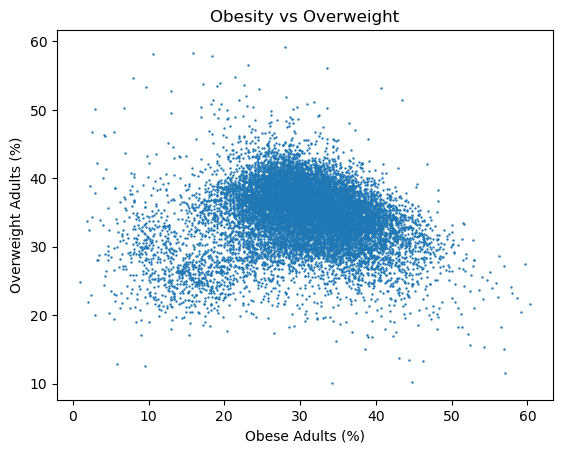

In [326]:
# Create scatter plot
plt.scatter(df2["Obese Adults (%)"], df2["Overweight Adults (%)"], s=0.5)
# Label plot
plt.xlabel("Obese Adults (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Obesity vs Overweight")

plt.show()

From the plot, it seems that there might not be a strong relationship positive correlation between obesity and overweight, which shows that overweight adults does not include obese adults. Therefore, for each plot where we use obesity, we will also create a plot for overweight and vice versa to get the most out of our data. Next, we'll make a scatter plot of obesity over time and overweight over time.

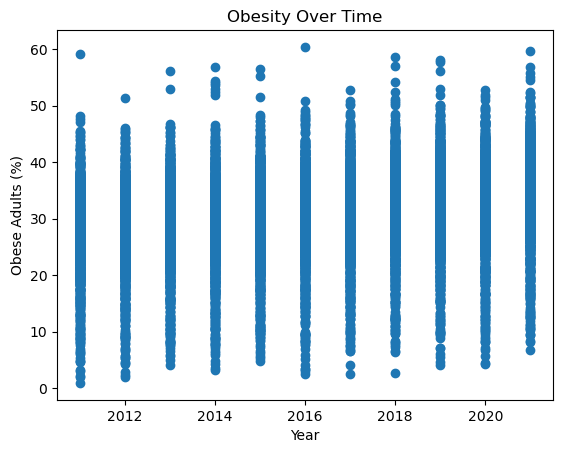

In [327]:
plt.scatter(df2["Year"], df2["Obese Adults (%)"])

plt.xlabel("Year")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity Over Time")

plt.show()

Oh no, it's hard to tell what this plot means because each year just looks like a line when put into a scatter plot. However, we can make something called a violin plot instead for this plot. A violin plot is where the distribution for each discrete x value is shown. We will use the seaborn library to create the violin plot.
If you would like to learn more about plotting violin plots with the seaborn library you can visit https://seaborn.pydata.org/generated/seaborn.violinplot.html

[Text(0.5, 1.0, 'Obesity Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Obese Adults (%)')]

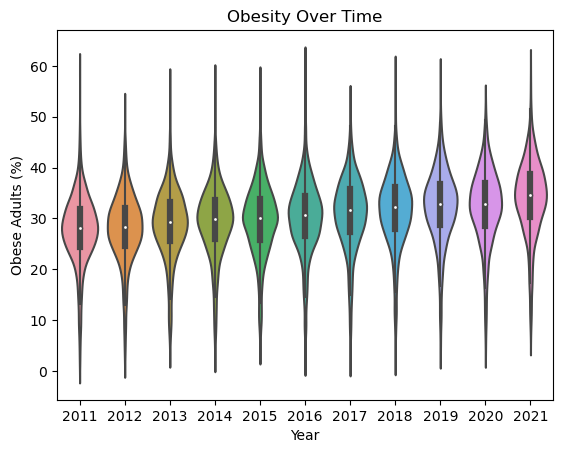

In [328]:
sns.violinplot(x=df2["Year"], y=df2["Obese Adults (%)"]).set(title="Obesity Over Time", 
                                                          xlabel="Year", 
                                                          ylabel="Obese Adults (%)")

That's a lot better! Now we can make some inferences about the data. The mins and maxes of the distributions appear to be varying randomly from year to year, but the majority of each distribution (between the lower and upper quartile, and also the mean) appears to be increasing from year to year. The null hypothesis is essentially our default hypothesis, and for looking at trends in data is essentially that there is no trend. Thus, it seems like we will end up rejecting the null hypothesis of no relationship between Year and Obesity, however, this will be verified later in the project (in the hypothesis testing section)! Next, let's look at the relationship between overweight and time.

[Text(0.5, 1.0, 'Overweight Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Overweight Adults (%)')]

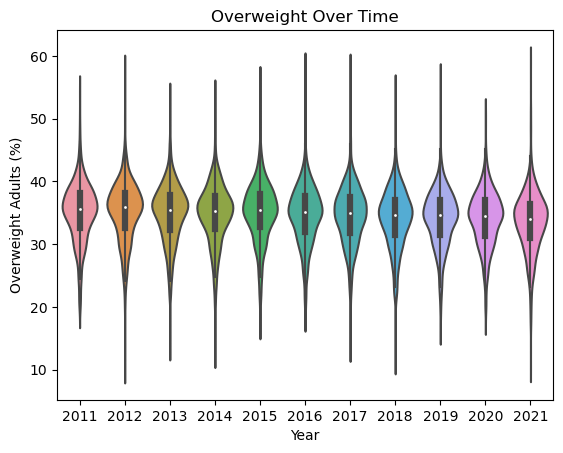

In [329]:
sns.violinplot(x=df2["Year"], y=df2["Overweight Adults (%)"]).set(title="Overweight Over Time", 
                                                          xlabel="Year", 
                                                          ylabel="Overweight Adults (%)")

Interestingly enough, the percentage of overweight adults actually seems to be staying around the same or even decreasing over time. It seems like for overweight over time, we will end up rejecting the null hypothesis, but the trend may be different from that for obesity. The cause of this could be because adults are going from overweight to obese, which would certainly be an issue. We will examine the rates that obesity/overweight are increasing/decreasing later in the project. We will next further examine the differences between obesity and overweight trends when looking at each as a function of different independent variables. Now, let's see how different independent variables other than time affect obesity/overweight rates!
We'll look at the relationship between obesity/overweight and the rates for: moderate aerobic activity, high aerobic activity, strengthening activity, moderate aerobic activity and strengthening activity, no physical activity, fruit consumption, and vegetable consumption.
Let's start off with looking at the relationship between obesity/overweight and moderate aerobic activity to see if a higher percentage of adults being aerobically active lowers the obesity/overweight rate!

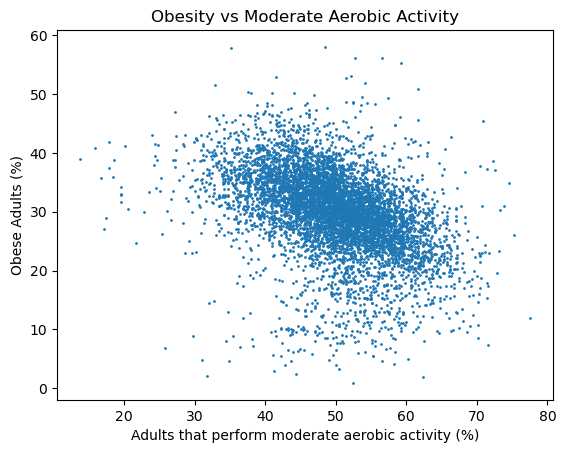

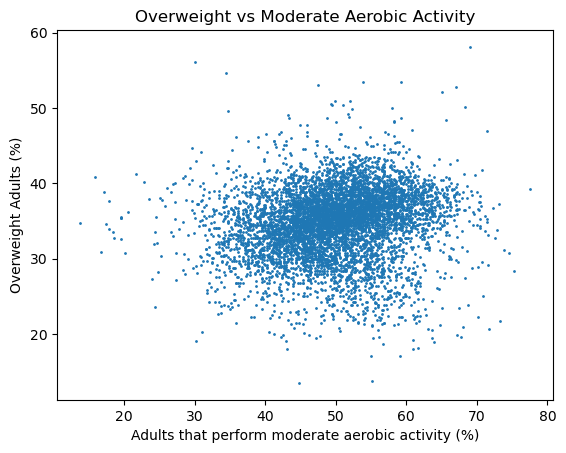

In [330]:
plt.scatter(df2["Adults that perform moderate aerobic activity (%)"], df2["Obese Adults (%)"], s=1)
plt.xlabel("Adults that perform moderate aerobic activity (%)")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity vs Moderate Aerobic Activity")
plt.show()

plt.scatter(df2["Adults that perform moderate aerobic activity (%)"], df2["Overweight Adults (%)"], s=1)
plt.xlabel("Adults that perform moderate aerobic activity (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Overweight vs Moderate Aerobic Activity")
plt.show()

As one might expect, higher rates of moderate arobic activity seem to tend to indicate lower rates of obesity, however might indicate slightly higher rates of overweight. Moderate Aerobic Activity appears to be an independent variable to look into further in later analysis. Now let's do the relationship between obesity/overweight and high aerobic activity!

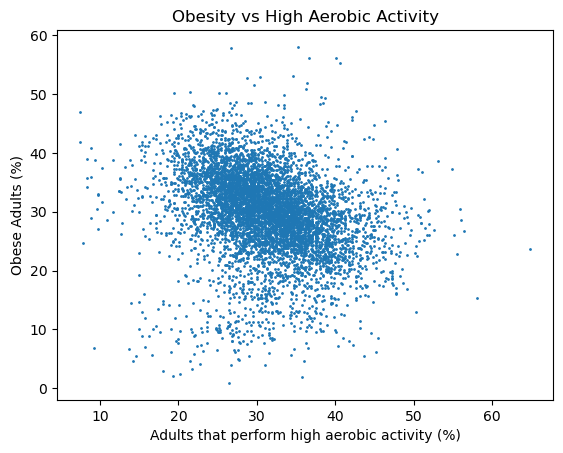

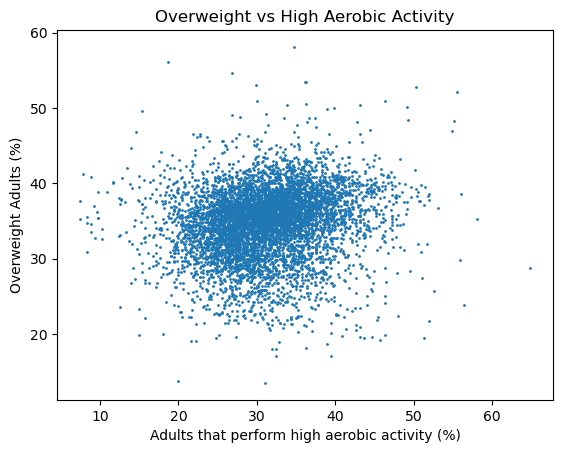

In [331]:
plt.scatter(df2["Adults that perform high aerobic activity (%)"], df2["Obese Adults (%)"], s=1)
plt.xlabel("Adults that perform high aerobic activity (%)")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity vs High Aerobic Activity")
plt.show()

plt.scatter(df2["Adults that perform high aerobic activity (%)"], df2["Overweight Adults (%)"], s=1)
plt.xlabel("Adults that perform high aerobic activity (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Overweight vs High Aerobic Activity")
plt.show()

The scatter plot for obese adults vs high aerobic activity appears to indicate a similar pattern as moderate aerobic activity, however, the trend in both of the plots seems to be slightly harsher. Meaning, as high aerobic activity increases, the proportion of obese adults decreases by more and the proportion of overweight adults increases by more. Next, let's look at the relationship between obesity/overweight and strengthening, and also the relationship between obesity/overweight and aerobic activity + strengthening to see the effect of strengthening.

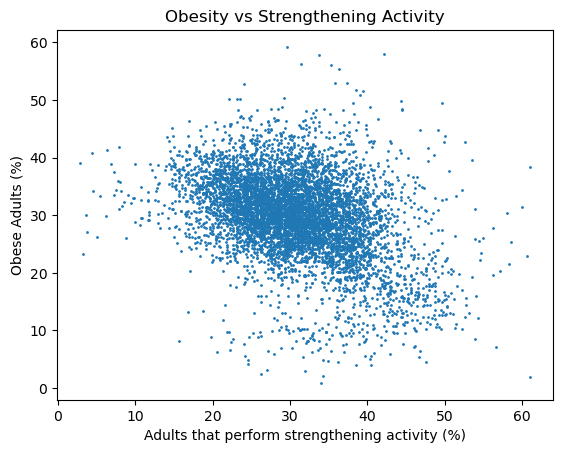

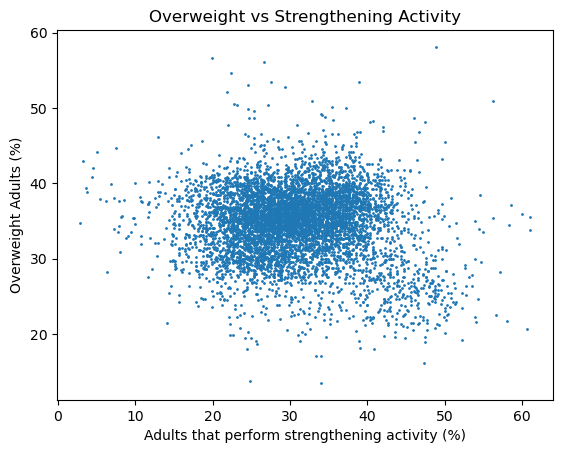

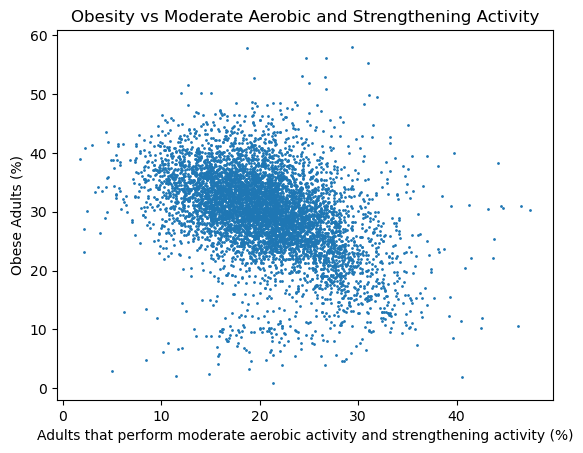

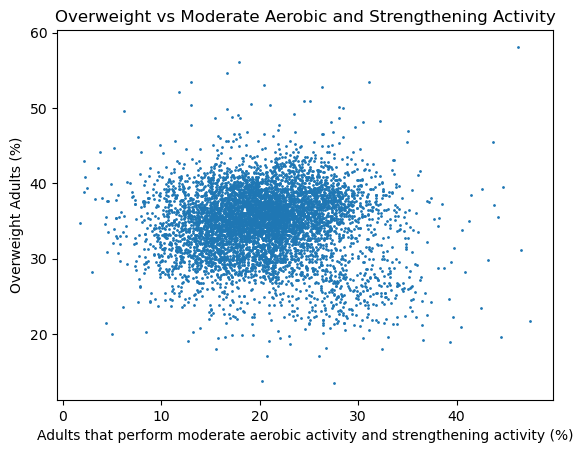

In [332]:
plt.scatter(df2["Adults that perform strengthening activity (%)"], df2["Obese Adults (%)"], s=1)
plt.xlabel("Adults that perform strengthening activity (%)")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity vs Strengthening Activity")
plt.show()

plt.scatter(df2["Adults that perform strengthening activity (%)"], df2["Overweight Adults (%)"], s=1)
plt.xlabel("Adults that perform strengthening activity (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Overweight vs Strengthening Activity")
plt.show()

plt.scatter(df2["Adults that perform moderate aerobic activity and strengthening activity (%)"], 
            df2["Obese Adults (%)"], s=1)
plt.xlabel("Adults that perform moderate aerobic activity and strengthening activity (%)")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity vs Moderate Aerobic and Strengthening Activity")
plt.show()

plt.scatter(df2["Adults that perform moderate aerobic activity and strengthening activity (%)"], 
            df2["Overweight Adults (%)"], s=1)
plt.xlabel("Adults that perform moderate aerobic activity and strengthening activity (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Overweight vs Moderate Aerobic and Strengthening Activity")
plt.show()

Again, the scatter plots for strengthening activity vs obesity indicate that a greater population exercising (in this case with strengthening exercises) may be negatively correlated with obesity rates, and that effect is greatened by also adding in aerobic exercise. For overweight, is seems that there isn't a too distinct trend either upwards or downwards, but we will try to determine if there is a trend later in the project. Let's also look at the relationship between obesity/overweight and no physical activity.

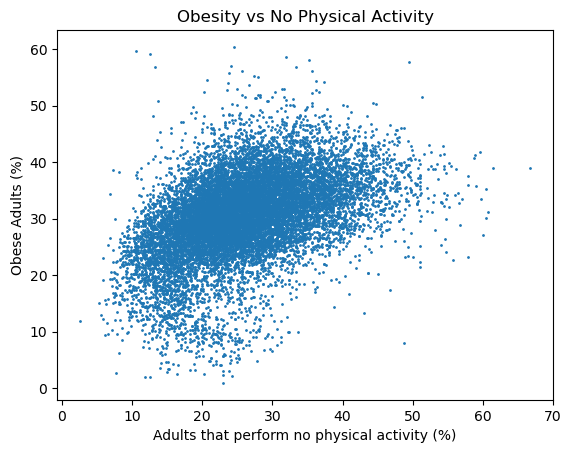

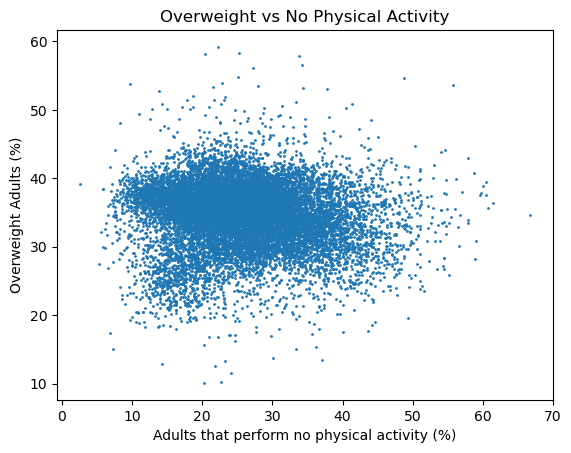

In [333]:
plt.scatter(df2["Adults that perform no physical activity (%)"], df2["Obese Adults (%)"], s=1)
plt.xlabel("Adults that perform no physical activity (%)")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity vs No Physical Activity")
plt.show()

plt.scatter(df2["Adults that perform no physical activity (%)"], df2["Overweight Adults (%)"], s=1)
plt.xlabel("Adults that perform no physical activity (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Overweight vs No Physical Activity")
plt.show()

The scatter plots indicate that there may be a positive correlation between a population's lack of physical activity and obesity. Unlike the earlier plots, this one could have a nonlinear trend, as there appears to be a steep dropoff in obesity as the percentage of adults that perform no physical activity gets very low. We will further examine the possibility of nonlinear trends in the data later in the project. The scatter plots also indicate the opposite trend for overweight, though less steep and the trend appears to be more linear aside from a mass of points that seems to lie far below the main mass of points.
Lastly, let's look at the relationship between obesity/overweight and fruit intake, and also the relationship between obesity/overweight and vegetable intake to see the effects of a population's diet on their obesity/overweight rate!

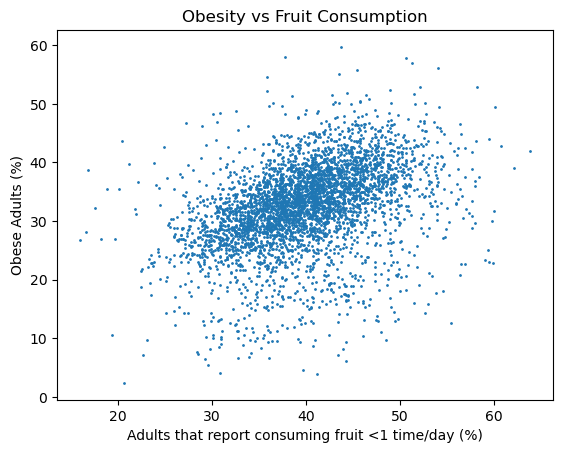

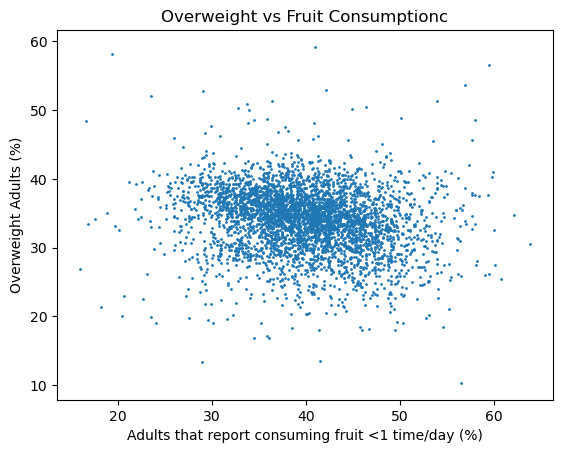

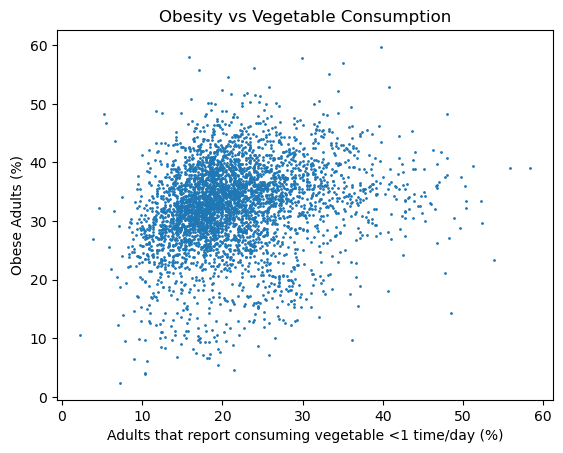

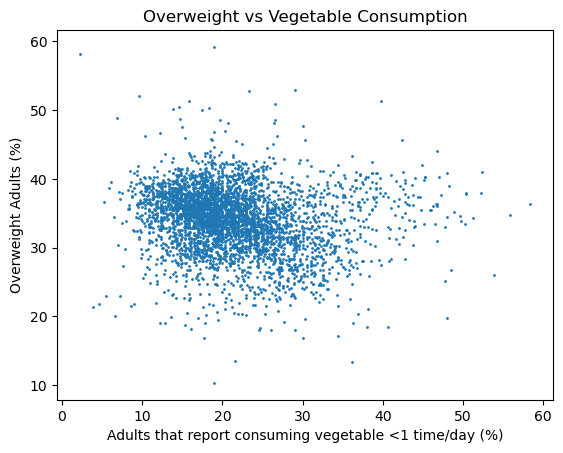

In [334]:
plt.scatter(df2["Adults that report consuming fruit <1 time/day (%)"], df2["Obese Adults (%)"], s=1)
plt.xlabel("Adults that report consuming fruit <1 time/day (%)")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity vs Fruit Consumption")
plt.show()

plt.scatter(df2["Adults that report consuming fruit <1 time/day (%)"], df2["Overweight Adults (%)"], s=1)
plt.xlabel("Adults that report consuming fruit <1 time/day (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Overweight vs Fruit Consumptionc")
plt.show()

plt.scatter(df2["Adults that report consuming vegetable <1 time/day (%)"], df2["Obese Adults (%)"], s=1)
plt.xlabel("Adults that report consuming vegetable <1 time/day (%)")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity vs Vegetable Consumption")
plt.show()

plt.scatter(df2["Adults that report consuming vegetable <1 time/day (%)"], df2["Overweight Adults (%)"], s=1)
plt.xlabel("Adults that report consuming vegetable <1 time/day (%)")
plt.ylabel("Overweight Adults (%)")
plt.title("Overweight vs Vegetable Consumption")
plt.show()

The scatter plots for fruits and for vegetables indicate another potential correlation. The correlation between a lack of fruit consumption and obesity appears to be pretty strong, with most of the points being around where a linear regression might be. There also seems to be a fairly strong negative correlation between a lack of fruit consumption and overweight. The scatter plot for overweight vs vegetable consumption seems to have something of a negative correlation between a lack of vegetable consumption and overweight, but as the lack of consumption gets higher, it seems to start going up again. The scatter plot for obesity vs vegetable consumption is quite interesting, as it is hard to tell exactly how obesity and vegetable consumption are correlated with each other from the scatter plot, though it would intuitively seem to be similar to fruit consumption. This correlation, and whether there is actually one, will be further examined later in the project.
Now let's plot each of the physical activity variables vs no physical activity. The aim here is to see if there’s correlation between the activities just to note that correlation when creating our linear regression later on. We wouldn't want to include all the activity variables if they all essentially give us the same information.

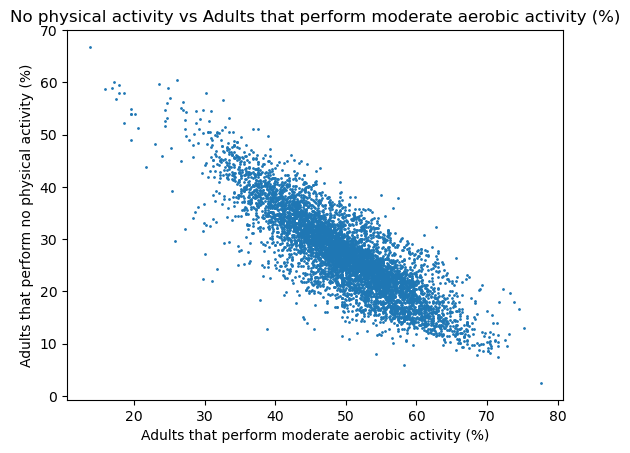

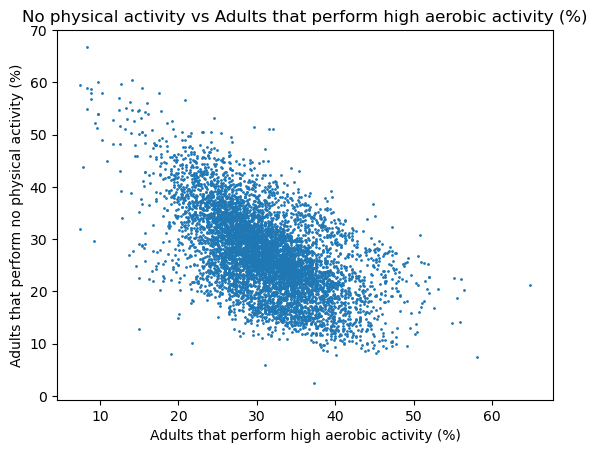

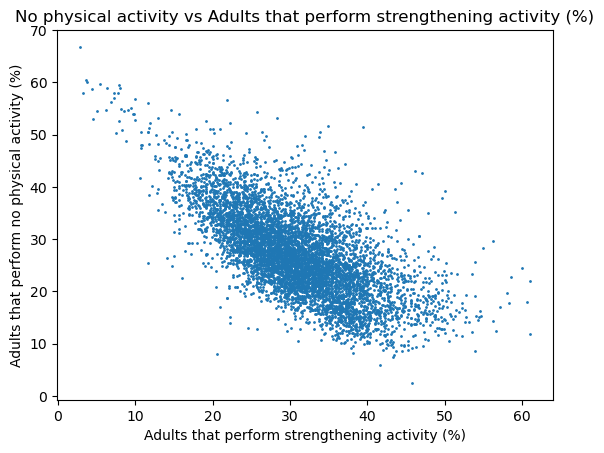

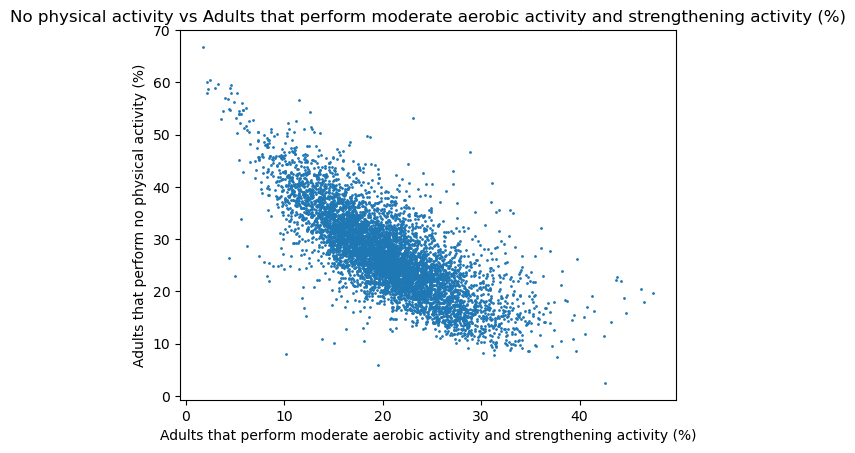

In [335]:
activityLst = ["Adults that perform moderate aerobic activity (%)",
         "Adults that perform high aerobic activity (%)",
         "Adults that perform strengthening activity (%)",
         "Adults that perform moderate aerobic activity and strengthening activity (%)"]

# For each of the activities, create a scatter plot of no physical activity rates as a function of them.
for activity in activityLst:
    plt.scatter(df2[activity], df2["Adults that perform no physical activity (%)"], s=1)
    plt.xlabel(activity)
    plt.ylabel("Adults that perform no physical activity (%)")
    plt.title("No physical activity vs " + activity)
    plt.show()

Just from observing the scatter plots, it seems as though there is a strong correlation between the proportion of adults that perform no physical activity and: the proportion of adults that perform moderate aerobic activity, strengthening activity, a combination of the two, or high aerobic activity. We will create linear regressions later for obesity as a function of each of these, however, for simplicity, we will only include "no physical activity" in our multivariable linear regression and other models.

Now let's look at the relationships between the stratifications and obesity/overweight. As each stratification category is split up into discrete groups, we will again use a violin plot for these plots to better represent the data. The aim here is to see if there are factors outside of individual's behavior that may impact their chances of obesity, or if those factors impact their behavior in such a way that it impacts their chances of obesity. We would also like to see how prominent those factors are.

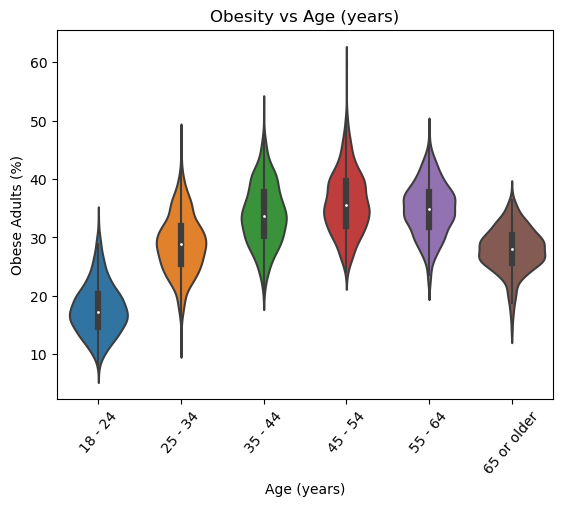

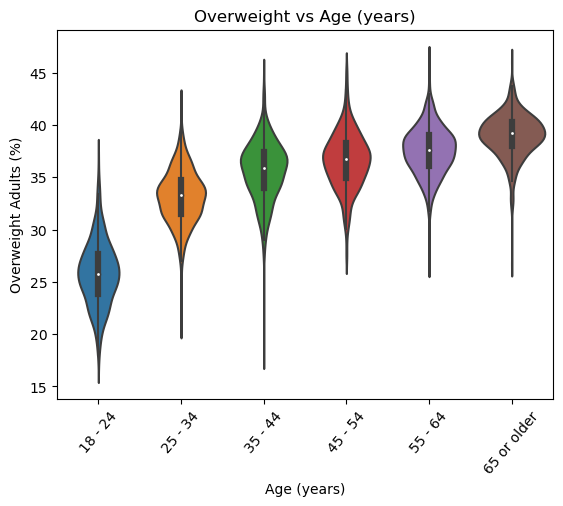

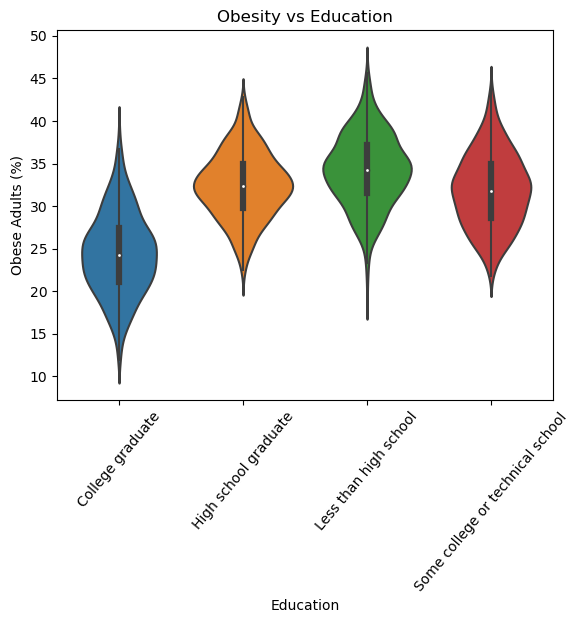

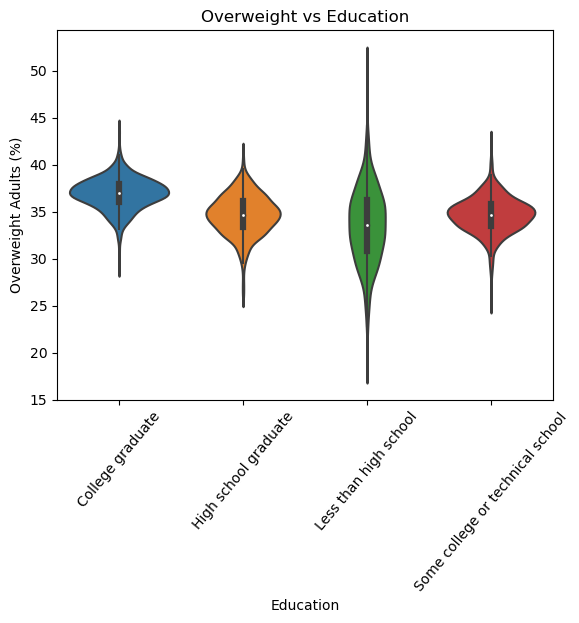

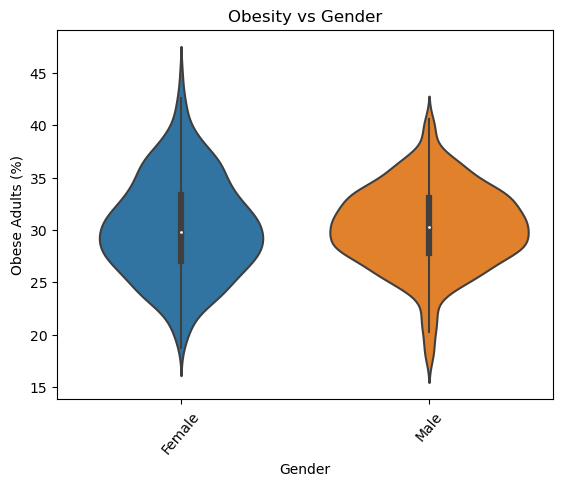

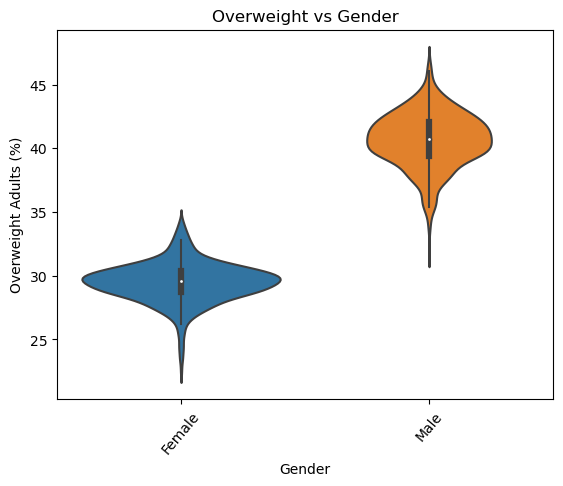

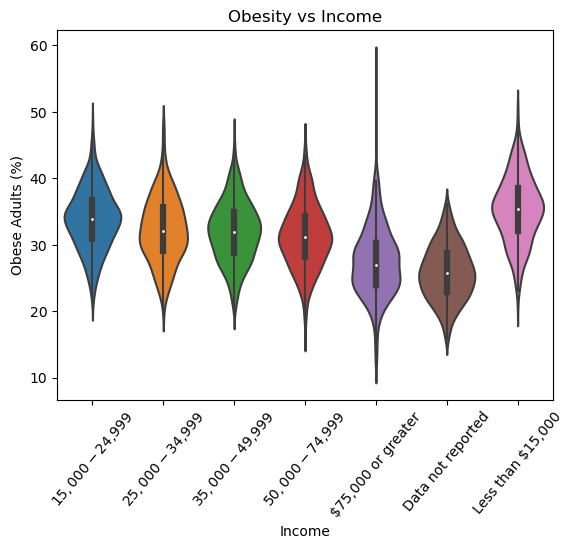

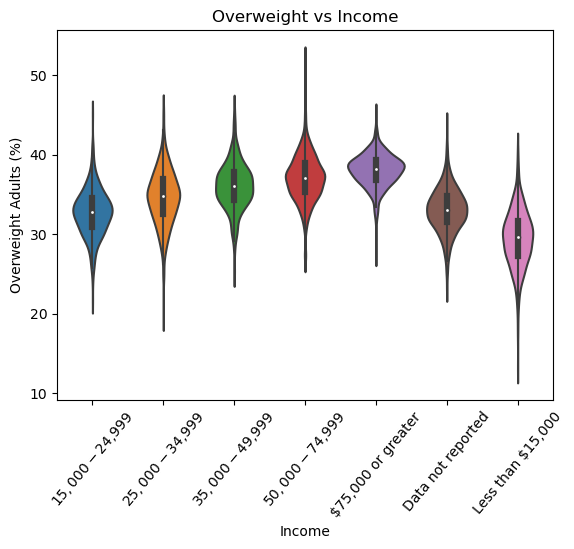

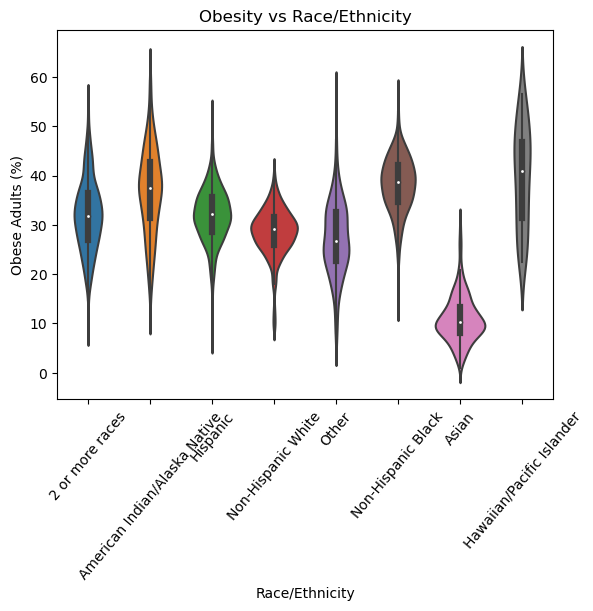

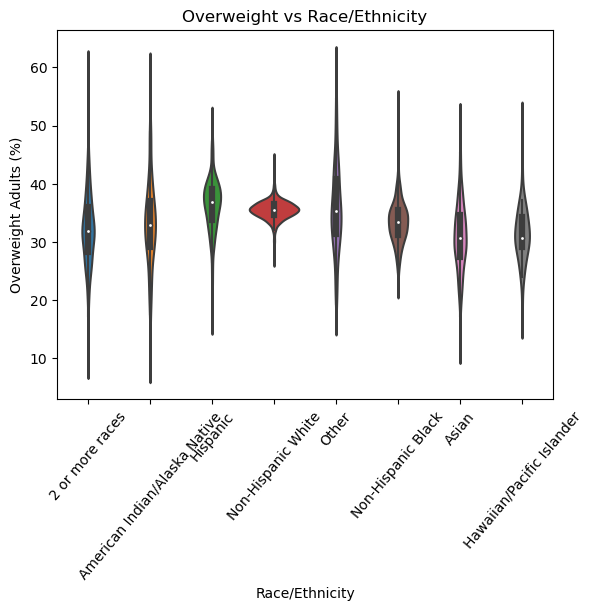

In [336]:
# Function that creates violin plots for obesity and overweight as a function of the different groups
# in a given group type.
def violinPlotOAndOW(groupDf, groupType):
    sns.violinplot(x=groupDf[groupType], y=groupDf["Obese Adults (%)"]).set(title="Obesity vs " + groupType, 
                                                              xlabel=groupType, 
                                                              ylabel="Obese Adults (%)")
    # Rotate the x labels so they don't overlap
    plt.xticks(rotation=50)
    plt.show()
    
    sns.violinplot(x=groupDf[groupType], y=groupDf["Overweight Adults (%)"]).set(title="Overweight vs " + groupType, 
                                                              xlabel=groupType, 
                                                              ylabel="Overweight Adults (%)")
    plt.xticks(rotation=50)
    plt.show()

# Create the violin plots for each stratification category
violinPlotOAndOW(ageDf, "Age (years)")
violinPlotOAndOW(educationDf, "Education")
violinPlotOAndOW(genderDf, "Gender")
violinPlotOAndOW(incomeDf, "Income")
violinPlotOAndOW(raceDf, "Race/Ethnicity")

All of the distributions for all the plots seem to be approximetly normal distributions with minimal skewing and only one peak in each distribution. For each stratification type, there seemed to be noticeable differences between each group, possibly indicating that variables outside of exercise and diet can influence obesity/overweight. We will consider each of the stratification types when creating our models, but firstly, I will briefly describe visibly noteable features of the plots.
For age, there seems to be a downward-opening parabolic trend as age increases for obesity, whereas the trend for overweight could be logarithmic or sqrt(x). 
Education seems to only have a fairly significant effect on obesity for college graduates, where it lowers the proportion of obese adults. On the other hand, overweight seems to not have any large changes depending on education, though college graduates do tend to have the highest proportion of overweight adults. 
Gender doesn't seem to affect obesity rates too much, though the female distribution seems to have a greater variance than the male distribution. However, the overweight rates are very different, with males being overweight significantly more often than females. 
Income seems to have a fairly steep downward trend of obesity rates as income gets higher, likely due to more healthy foods costing more. Overweight rates increase as income increases, however, not nearly as much as obesity decreases. Making healthy food more accessible to those with lower income could be a good step towards reducing obesity rates.

For Race/Ethnicity, the obesity rate for each race/ethnicity is slightly different from the others. The obesity rate for Asian adults is noteably significantly lower than the other obesity rates. It is worth noting that as the data contains entries for places other than America, the race/ethnicity data may be reflective of someone's location. For overweight rates, the distributions all seem to be somewhat similar to each other. To make the order of obesity rates clearer, let's calculate the means for each race/ethnicity.

In [337]:
# Group the race/ethnicity dataframe by race/ethnicity, taking the mean of obesity to put into each row.
raceDfMeans = raceDf.groupby("Race/Ethnicity", as_index=False).agg({"Obese Adults (%)": np.mean})
raceDfMeans

Race/Ethnicity  Obese Adults (%)
0                2 or more races         32.047222
1  American Indian/Alaska Native         36.869330
2                          Asian         10.966839
3      Hawaiian/Pacific Islander         39.714634
4                       Hispanic         32.055846
5             Non-Hispanic Black         38.303383
6             Non-Hispanic White         28.566379
7                          Other         27.281122

The order, from the means above from higher obesity rate to lowest is:
1. Hawaiian/Pacific Islander
2. Non-Hispanic Black
3. American Indian/Alaska Native
4. Hispanic
5. 2 or more races
6. Non-Hispanic White
7. Other
8. Asian
The cause for these differences, whether it be based on country, effects racial discrimination within countries, or something else, seems to be a topic worth looking into further, but that is beyond the scope of this project.

# Hypothesis Testing & Machine Learning
In this section, we will use linear regressions to check the ideas that we had in the last section from just looking at the plots. We will also be able to now use the p-values to confirm that we can reject the null hypothesis and say there are correlations between the variables. We will then use several techniques to attempt to use our variables for year, activity level, and diet to predict obesity rates in the future and play out hypothetical scenarios. Throughout this section, we will be using the sklearn library to create our single variable ordinary least squares (OLS) regressions and a couple machine learning models. We will use statsmodels to create a multi-variable OLS regression. We'll also be testing our models using a couple different loss techniques to attempt to quantify how good each of our models are.
You can learn more about sklearn here: https://scikit-learn.org/stable/
You can learn more about statsmodels here: https://www.statsmodels.org/stable/index.html
Recall our dataframe that contained information from every stratification from earlier:

In [338]:
df2.head()

Year LocationAbbr LocationDesc StratificationCategory Stratification  \
0  2011           AK       Alaska            Age (years)        18 - 24   
1  2011           AK       Alaska            Age (years)        25 - 34   
2  2011           AK       Alaska            Age (years)        35 - 44   
3  2011           AK       Alaska            Age (years)        45 - 54   
4  2011           AK       Alaska            Age (years)        55 - 64   

   Overweight Adults (%)  Obese Adults (%)  \
0                   32.0              19.8   
1                   38.7              23.5   
2                   38.9              29.5   
3                   43.3              29.2   
4                   38.9              33.4   

   Adults that perform moderate aerobic activity (%)  \
0                                               62.8   
1                                               57.6   
2                                               55.3   
3                                               56.2   
4                                               58.2   

   Adults that perform moderate aerobic activity and strengthening activity (%)  \
0                                               34.9                              
1                                               27.0                              
2                                               22.2                              
3                                               25.2                              
4                                               20.1                              

   Adults that perform high aerobic activity (%)  \
0                                           32.4   
1                                           35.7   
2                                           32.3   
3                                           38.8   
4                                           43.3   

   Adults that perform strengthening activity (%)  \
0                                            51.9   
1                                            36.4   
2                                            30.8   
3                                            32.4   
4                                            26.6   

   Adults that perform no physical activity (%)  \
0                                          16.1   
1                                          18.1   
2                                          21.1   
3                                          24.7   
4                                          26.0   

   Adults that report consuming fruit <1 time/day (%)  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   Adults that report consuming vegetable <1 time/day (%)  
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN

Let's first just do a normal OLS linear regression for each of the plots that we made earlier to verify the trends that we thought were possible. An OLS linear regression is a linear regression algorithm that minimizes the mean squared error (the mean of each of the differences between the linear regression's predicted value and actual value squared).
To learn more about OLS linear regression, you can observe https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols.

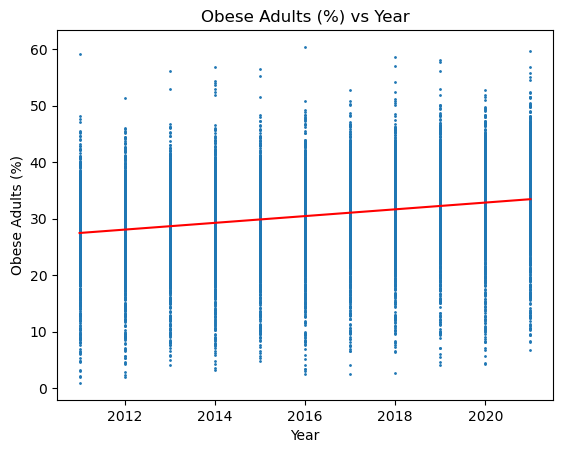

Coefficient: 0.5985204274880306
Intercept: -1176.1732825246931
P-values:
  Intercept    8.024518e-218
Q('Year')    9.389186e-229
dtype: float64


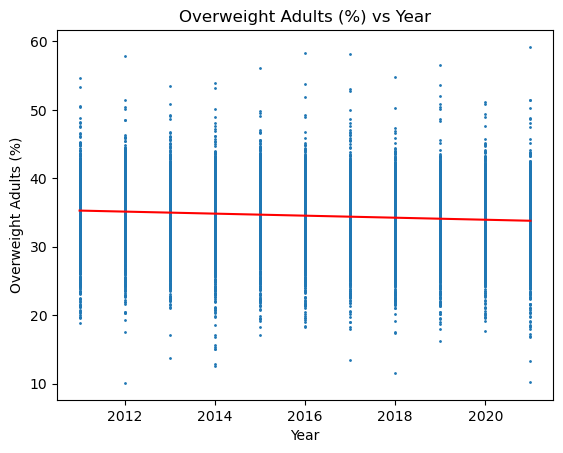

Coefficient: -0.14862429376026784
Intercept: 334.16730444741484
P-values:
  Intercept    4.822739e-43
Q('Year')    5.510144e-35
dtype: float64


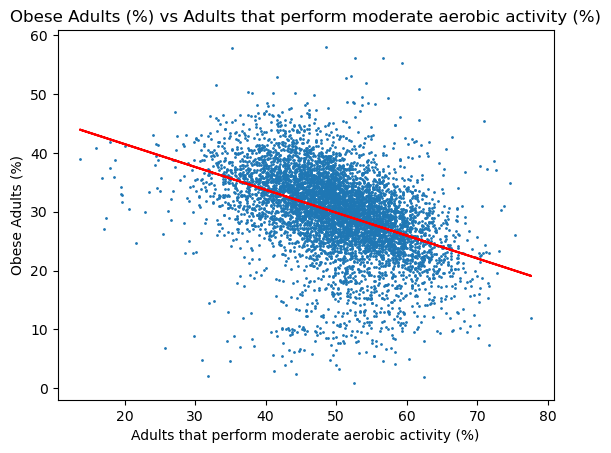

Coefficient: -0.38877644507720366
Intercept: 49.268246783838705
P-values:
  Intercept                                                  0.000000e+00
Q('Adults that perform moderate aerobic activity (%)')    3.797739e-295
dtype: float64


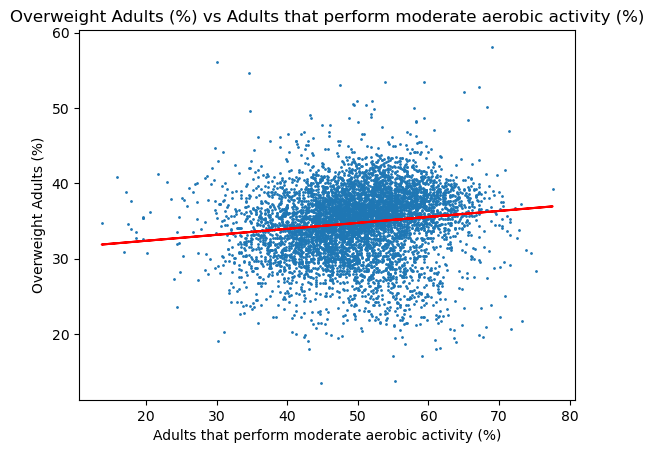

Coefficient: 0.07918194405727305
Intercept: 30.786068736699008
P-values:
  Intercept                                                 0.000000e+00
Q('Adults that perform moderate aerobic activity (%)')    1.023264e-28
dtype: float64


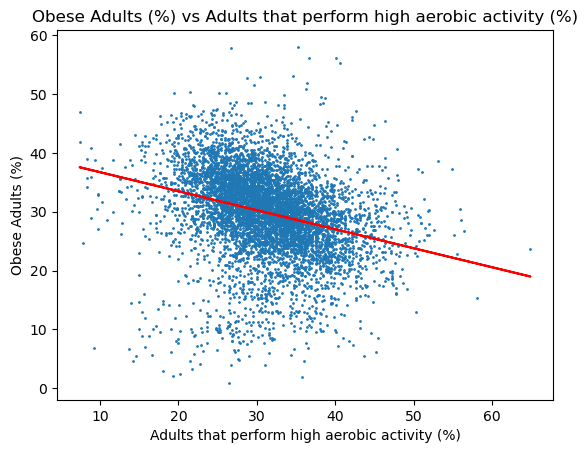

Coefficient: -0.323149057603583
Intercept: 39.9469067385425
P-values:
  Intercept                                              0.000000e+00
Q('Adults that perform high aerobic activity (%)')    6.432632e-126
dtype: float64


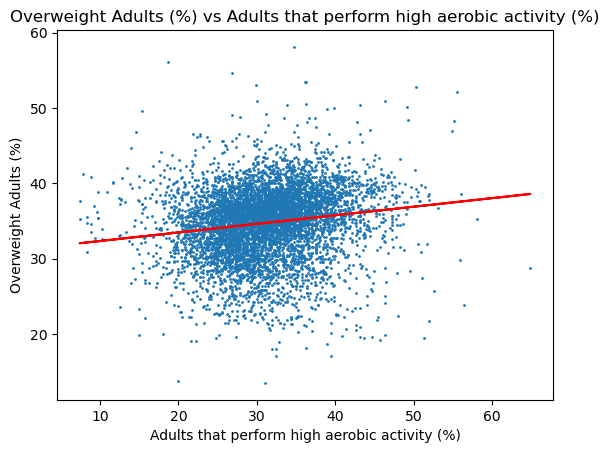

Coefficient: 0.1138136893048295
Intercept: 31.19865440835807
P-values:
  Intercept                                             0.000000e+00
Q('Adults that perform high aerobic activity (%)')    5.514568e-38
dtype: float64


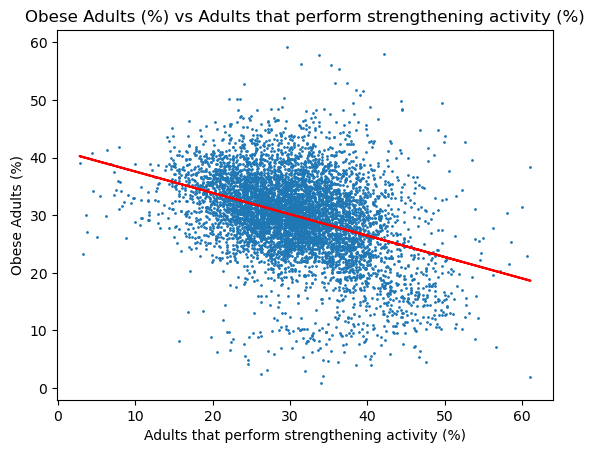

Coefficient: -0.3708102921427105
Intercept: 41.29011123614952
P-values:
  Intercept                                               0.000000e+00
Q('Adults that perform strengthening activity (%)')    1.099221e-231
dtype: float64


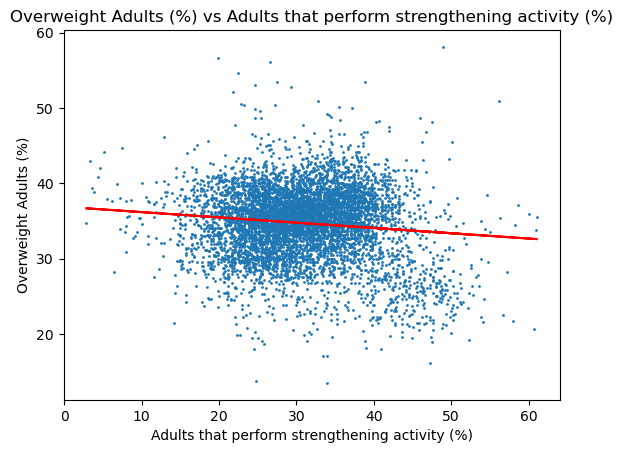

Coefficient: -0.07014599216919408
Intercept: 36.87424701350102
P-values:
  Intercept                                              0.000000e+00
Q('Adults that perform strengthening activity (%)')    4.276036e-20
dtype: float64


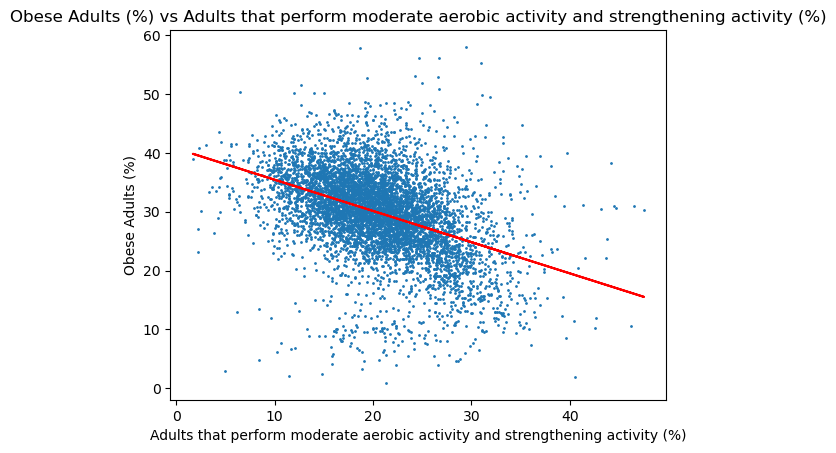

Coefficient: -0.530693209660792
Intercept: 40.73979301062703
P-values:
  Intercept                                                                             0.000000e+00
Q('Adults that perform moderate aerobic activity and strengthening activity (%)')    1.175017e-284
dtype: float64


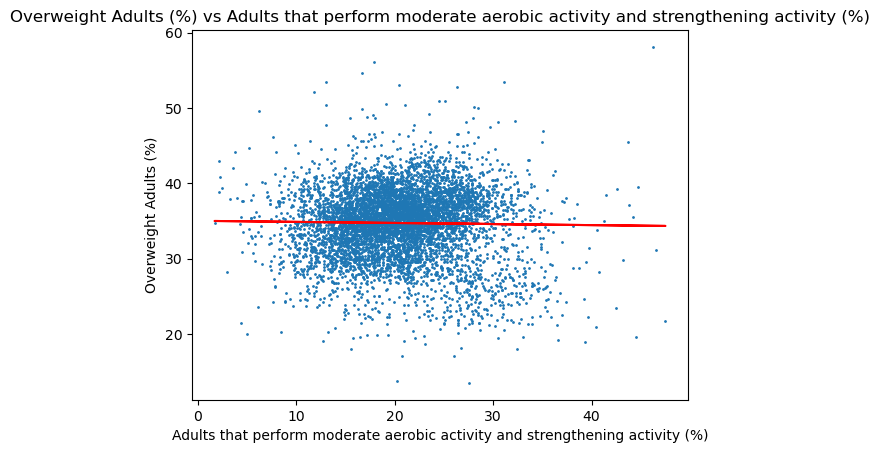

Coefficient: -0.014366291975273485
Intercept: 35.02085824126587
P-values:
  Intercept                                                                            0.000000
Q('Adults that perform moderate aerobic activity and strengthening activity (%)')    0.147432
dtype: float64


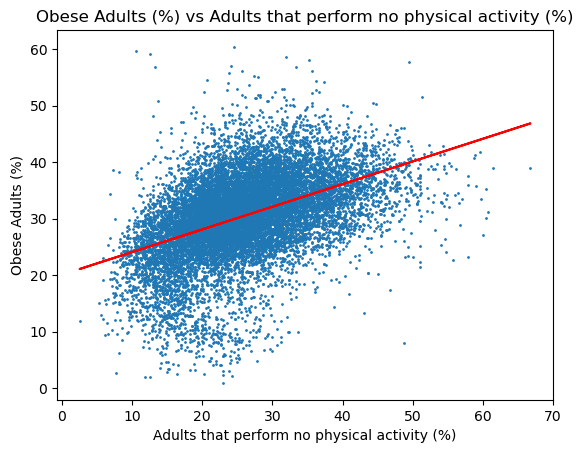

Coefficient: 0.40115806893884565
Intercept: 20.065259140634772
P-values:
  Intercept                                            0.0
Q('Adults that perform no physical activity (%)')    0.0
dtype: float64


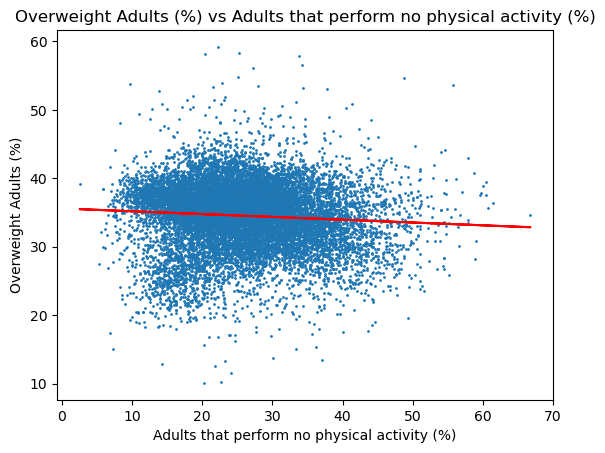

Coefficient: -0.04109239746716446
Intercept: 35.595619286578696
P-values:
  Intercept                                            0.000000e+00
Q('Adults that perform no physical activity (%)')    2.819748e-19
dtype: float64


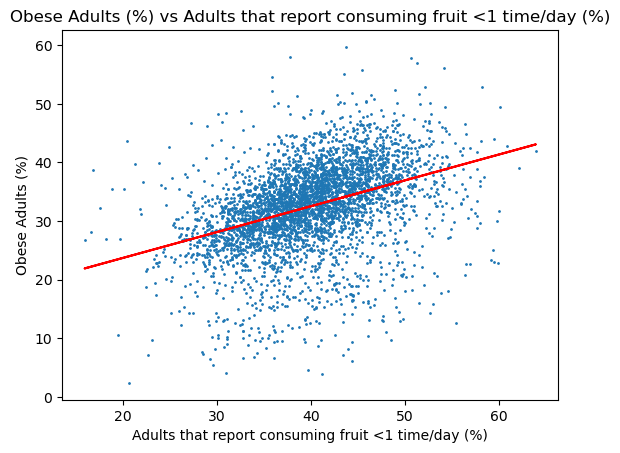

Coefficient: 0.4405669142821541
Intercept: 14.921573158223882
P-values:
  Intercept                                                  1.054043e-104
Q('Adults that report consuming fruit <1 time/day (%)')    2.837728e-144
dtype: float64


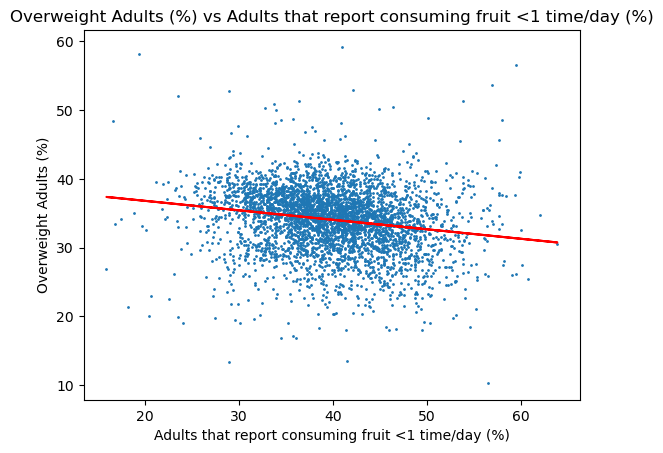

Coefficient: -0.13800507738621526
Intercept: 39.56152342777929
P-values:
  Intercept                                                  0.000000e+00
Q('Adults that report consuming fruit <1 time/day (%)')    9.181212e-35
dtype: float64


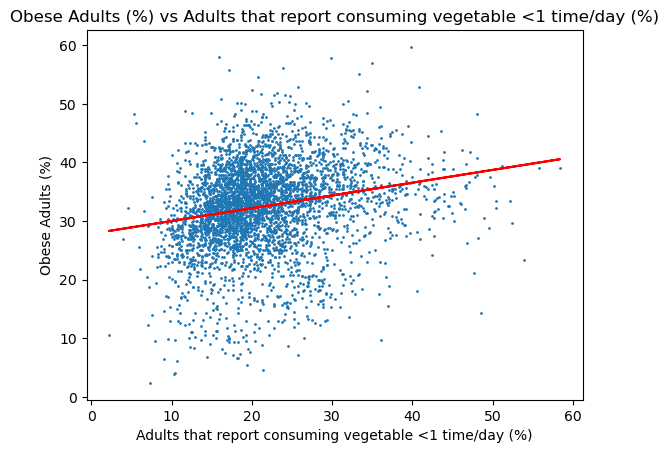

Coefficient: 0.21767177283781308
Intercept: 27.84089843090702
P-values:
  Intercept                                                      0.000000e+00
Q('Adults that report consuming vegetable <1 time/day (%)')    6.177615e-42
dtype: float64


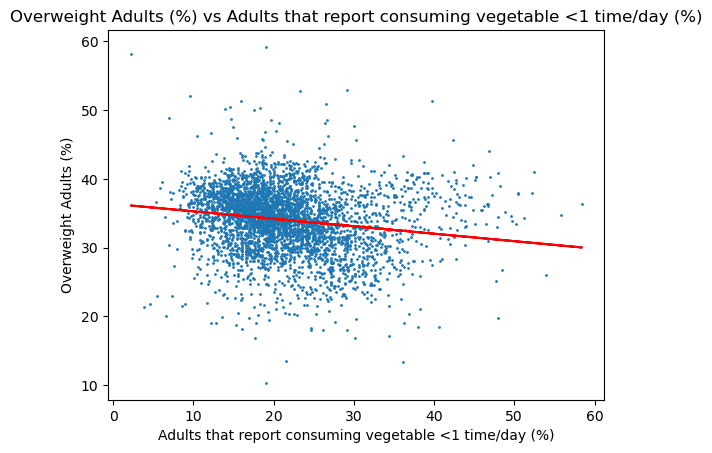

Coefficient: -0.10857487096274444
Intercept: 36.35716987269333
P-values:
  Intercept                                                      0.000000e+00
Q('Adults that report consuming vegetable <1 time/day (%)')    1.024277e-26
dtype: float64


In [339]:
# Function that creates a single variable OLS linear regression of y as a function of x using the data
# in dataframe df and then plots the data along with the line for the linear regression
def runOls(df, x, y):
    # Can't use NaN values in the linear regression, so drop them
    df = df.dropna(subset=[x, y])
    
    # Fit the linear regression
    reg = LinearRegression().fit(df[x].values.reshape(-1, 1), df[y])
    regY = reg.predict(df[x].values.reshape(-1, 1))
    
    # Find the pvalue for the linear regression (this is easier in statsmodels, so we make the same linear
    # regression with statsmodels to get the pvalue)
    smfReg = smf.ols(formula="Q('" + y + "') ~ " + "Q('" + x + "')", data=df).fit()
    pvalue = smfReg.pvalues
    
    # Scatter plot the points from the data
    plt.scatter(df[x], df[y], s=1)
    
    # Plot the linear regression line
    plt.plot(df[x], regY, color="red")
    
    plt.title(y + " vs " + x)
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()
    
    print("Coefficient:", reg.coef_[0])
    print("Intercept:", reg.intercept_)
    print("P-values:\n ", pvalue)

# Now we can easily make an OLS regression for each of the independent variables:
for indVar in varLst:
    runOls(df2, indVar, "Obese Adults (%)")
    runOls(df2, indVar, "Overweight Adults (%)")

It seems as though all of our predictions from earlier were correct! The proportion of obese adults appears to increase as year, proportion of no physical activity, proportion of adults that report consuming fruit <1 time/day, or proportion of adults that report consuming vegetables <1 time/day increase. The proportion of overweight adults appears to decrease as the above variables increase, however, it does not decrease nearly as much as obesity increases. Obesity appears to decrease as proportion of adults that perform moderate or high aerobic activity, proportion of adults that perform strengthening activity, proportion of adults that perform strengthening and moderate aerobic activity increase. The proportion of overweight adults appears to also decrease but at a significantly lower rate as all of the above variables increase except for the proportion of adults that perform moderate or high aerobic activity, where the proportion of overweight adults increases as they increase.
To officially reject the null hypothesis that there is no correlation for each plot, we just need a pvalue less than 0.05. All of the pvalues for the above linear regression were not only below 0.05, but were all insanely close to 0, except for overweight adults as a function of moderate aerobic activity and strengthening activity, which was over 0.05. Thus, we can reject the null hypothesis and say that there is a correlation for each of the plots except for overweight adults vs moderate aerobic activity and strengthening activity. However, from here on, for simplicity, we will only focus on obesity. Thus, all of the variables that we will be using are very strongly correlated with obesity, our dependent variable.
However, recall from earlier that we were considering only having "no physical activity" instead of having all of the different physical activity variables, and we observed that there could be a quite strong correlation between no physical activity and the other activity variables. To confirm that idea, let's make linear regressions to observe the correlations between the different proportions of adults that perform physical activity vs no physical activity.
If you'd like to know more about p values and hypothesis testing, visit https://www.scribbr.com/statistics/p-value/

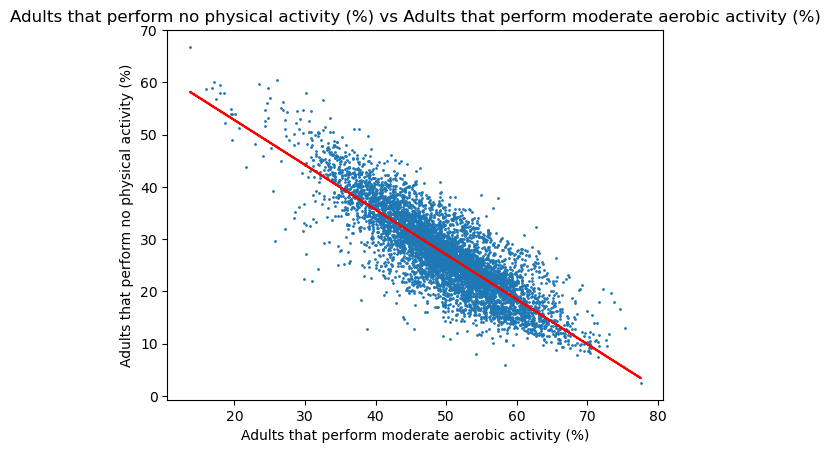

Coefficient: -0.8575225398991049
Intercept: 69.9509046791437
P-values:
  Intercept                                                 0.0
Q('Adults that perform moderate aerobic activity (%)')    0.0
dtype: float64


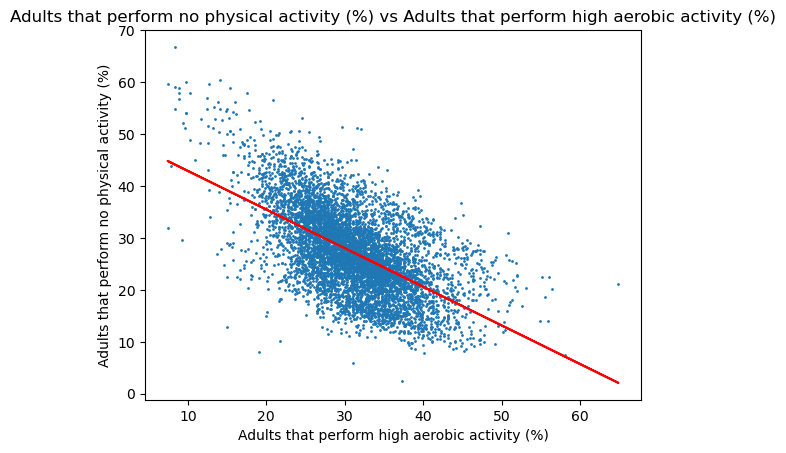

Coefficient: -0.7437262263114626
Intercept: 50.34703366612993
P-values:
  Intercept                                             0.0
Q('Adults that perform high aerobic activity (%)')    0.0
dtype: float64


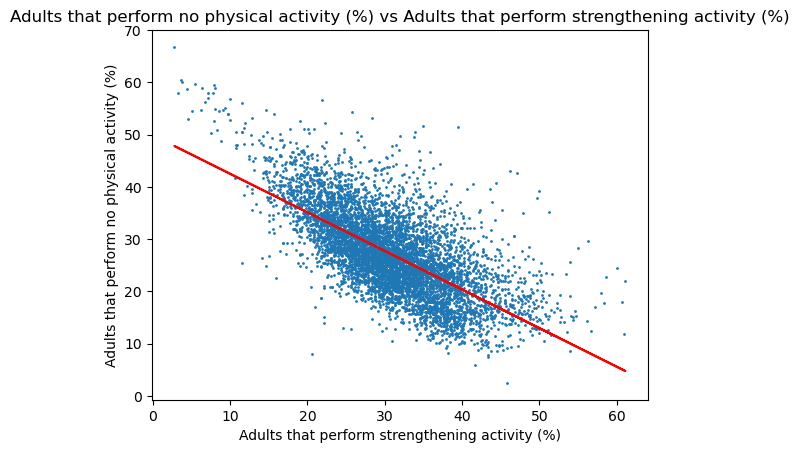

Coefficient: -0.738559734973998
Intercept: 49.91282939462981
P-values:
  Intercept                                              0.0
Q('Adults that perform strengthening activity (%)')    0.0
dtype: float64


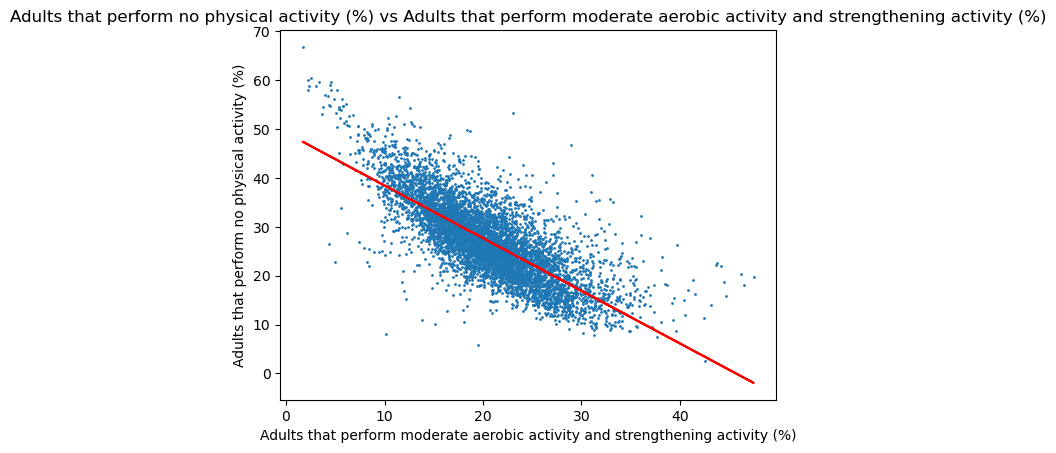

Coefficient: -1.0770696908340711
Intercept: 49.22788069877941
P-values:
  Intercept                                                                            0.0
Q('Adults that perform moderate aerobic activity and strengthening activity (%)')    0.0
dtype: float64


In [340]:
for activity in activityLst:
    runOls(df2, activity, "Adults that perform no physical activity (%)")

Wow! We got p-values of 0 for every plot! I believe that this confirms our idea from earlier that there is a very strong correlation between all of the activity variables, so we will thus only use "no physical activity" as the independent variable for all activity.
We shall now create a regression of obesity over all our independent variables and of overweight over all our independent variables. For both of these regressions, it seems as though the independent variables interact with each other as shown by the above plot, so we will also add interaction terms. Interaction terms are much easier to use with statsmodels.formula.api, and we can also easily find the p-value of our regression with that to see just how good our final regression is, so we will use it instead of sklearn.

In [341]:
# Create a new list that excludes the other physical activity proportions
pltLst = ["Year", "Adults that perform no physical activity (%)",
         "Adults that report consuming fruit <1 time/day (%)",
         "Adults that report consuming vegetable <1 time/day (%)"]

# Add year as the first independent variable in the formula, thus exclude it from the list
pltLst2 = pltLst[1:]
formula = "Q('Obese Adults (%)') ~ Year"

# Add the other independent variables to the formula
for indVar in pltLst2:
    formula += " * " + "Q('" + indVar + "')" # "*" automatically creates an interaction term
    
# Create the regression
multiReg = smf.ols(formula=formula, data=df2).fit()
print("Multi-variable OLS regression parameters:\n", multiReg.params)

Multi-variable OLS regression parameters:
 Intercept                                                                                                                                                                    -395.711496
Year                                                                                                                                                                            0.197347
Q('Adults that perform no physical activity (%)')                                                                                                                             236.963705
Year:Q('Adults that perform no physical activity (%)')                                                                                                                         -0.117337
Q('Adults that report consuming fruit <1 time/day (%)')                                                                                                                        28.784025
Year:Q('Adults that report consu

All of these parameters are rather difficult to interpret, so as a way to visualize how well our linear regression fits the data, we'll graph the residuals of the linear regression. The residuals are the differences between the actual values and the values predicted by the linear regression, so they will give us an idea of how far apart the real values are from our line. We will also use some loss functions later on to get a better idea of how good our models are.

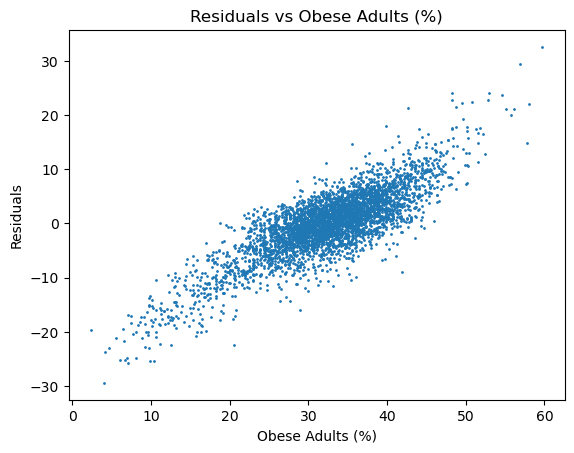

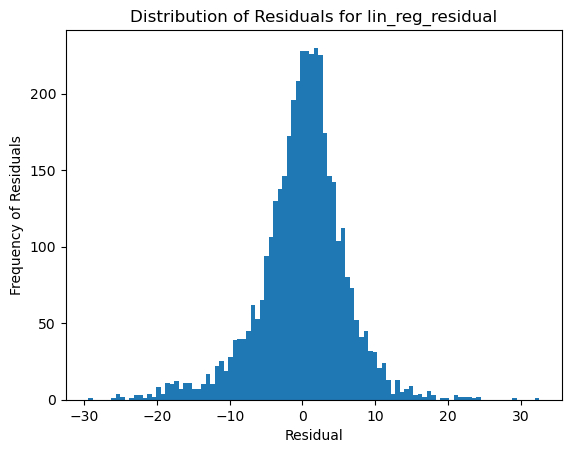

In [342]:
# Add a column to the dataframe for the residuals
df2["lin_reg_residual"] = multiReg.resid

# The residuals would be NaN for rows where there was a NaN value, so drop the NaN rows
resDf = df2.dropna(subset=["lin_reg_residual"])

# Function that scatter plots the residuals as a function of x and then just plots the distribution of the
# residuals using a 100-bar bar graph
def plotRes(df, x, resName):
    # Create a scatter plot of residuals as a function of x
    plt.scatter(df[x], df[resName], s=1)
    plt.xlabel(x)
    plt.ylabel("Residuals")
    plt.title("Residuals vs " + x)
    plt.show()
    
    # Let's also create a distribution for the residuals to get a better idea of just the residuals themselves.
    plt.hist(df[resName], 100)
    plt.xlabel("Residual")
    plt.ylabel("Frequency of Residuals")
    plt.title("Distribution of Residuals for " + resName)
    plt.show()

# Plot the residuals as a function of the proportion of obese adults and plot the distribution of residuals
plotRes(resDf, "Obese Adults (%)", "lin_reg_residual")

Most of our residuals are centered around 0 and are quite close to 0, though there are some outliers. The distribution of the residuals appears to be a normal distribution. Both of these facts are normal if the assumptions of a linear regression (most importantly that there is a linear trend in the data) are met. At the moment, this looks like a good initial model, however, we shall now try a couple of machine learning techniques to see if we can do better or similar.

### Gradient Descent
Gradient descent will be the first machine learning technique that we use. Gradient descent for linear regressions is an iterative process that tries to take steps in the direction (in k-dimensions) where the error is most minimized. Essentially, it tries to figure out which direction to move in for each parameter to make the error less. The step size for this process is specified by eta. Fortunately, we don't have to worry much about the intricacies of the method aside from the step size, because sklearn provides a function to perform a gradient descent linear regression for us!
We will also be breaking up the data into training data and testing data to try to get the best picture of how our model could be used to predict. Underfitting is a problem where our line doesn't quite follow the trend of the data well enough, but here we are possibly worried about overfitting. Overfitting is where the line fits its exact training set too well, and when it's tested on new data, fails to have good predictive ability from being too sensitive to noise in the data. By training our model with training data and testing it with testing data, we get an idea of the model's actual predicitve capabilities and not just how well it fits to the training data.
If you'd like to learn more about how gradient descent actual works, visit: https://scikit-learn.org/stable/modules/sgd.html
If you'd just like to learn about how to use the sklearn gradient descent function, visit: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [343]:
# We only need the variables we'll be using for the model for this, and we'll need each row to be full, so create a new
# dataframe that only contains rows full of the variables that we will be using
gradDf = df2[["Obese Adults (%)"] + pltLst].dropna()

# Separate the data into testing and training data
x_train, x_test, y_train, y_test = train_test_split(gradDf[pltLst], gradDf["Obese Adults (%)"], test_size=0.5)

# Dependent variable
y = gradDf["Obese Adults (%)"]

# Gradient descent requires a constant offset if the data is not centered around 0, which it is not in this case,
# so add a constant column to the training data
const_x_train = add_constant(x_train)

# Set our step size (this was chosen through some trial and error to minimize residuals)
eta = 0.000001

# Create the gradient descent regression
gradReg = SGDRegressor(eta0=eta).fit(const_x_train, y_train)

print("Gradient Descent Coefficient:", gradReg.coef_)
print("Gradient Descent Intercept:", gradReg.intercept_[0])

Gradient Descent Coefficient: [ 2.16129881e-05  1.09234839e-02  2.75506023e-01  2.74821042e-02
 -1.10229657e-01]
Gradient Descent Intercept: 2.1613002286392966e-05


Again, it is hard to tell things about the model just from the raw numbers above, so we will again plot the residuals.

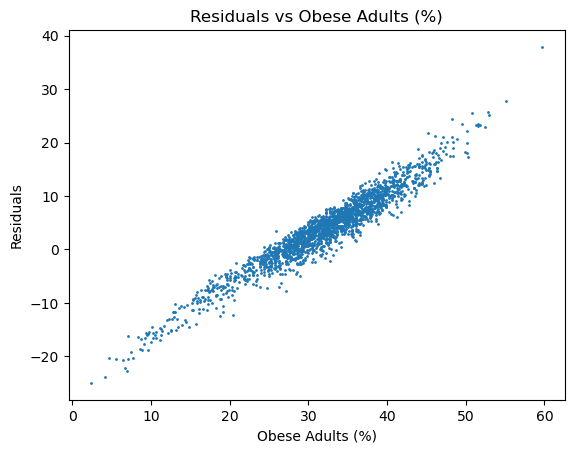

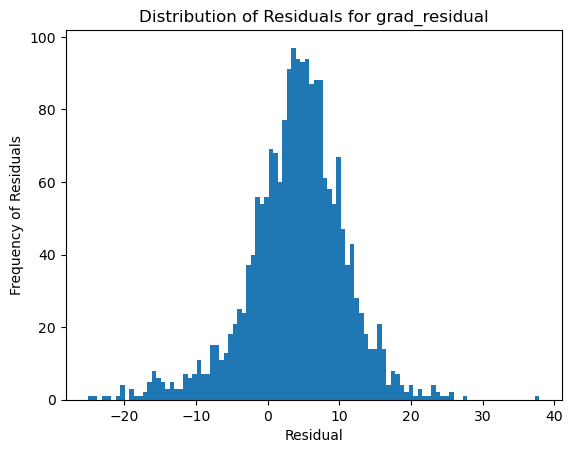

In [344]:
# Calculate the residuals for the gradient descent model
gradDf["grad_residual"] = y_test - gradReg.predict(add_constant(x_test))

# Plot the residuals
plotRes(gradDf, "Obese Adults (%)", "grad_residual")

Like before, many of the residuals are centered around 0 and their distribution is a normal distribution. Overall, the distribution looks extremely similar to the one for our normal OLS regression, so we can't say for certain which one is better yet, or if one of them necessarily is better. However, later, we will use loss functions to try to quantify how good our machine learning models are relative to the OLS function.

### Support Vector Regression
A support vector machine creates a hyperplane (a shape of one dimension lower than the dimension that it resides in) that tries to separate categorical points as best as possible. It is a classification algorithm, however, we are trying to create a linear regression, so we will use the regression version of it, support vector regression. Support vector regression is intuitively fairly similar, and creates a hyperplane that tries to fit points in a way such that it minimizes error. Again, sklearn fortunately provides us with a function that takes care of all the complicated stuff so we just have to worry about a few parameters. The kernel specifies that we are looking for a linear regression, as there seems to be a linear trend in our data. For the rest of the parameters, we will keep the defaults.
If you'd like to learn more about SVR (and about SVM), visit: https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/
If you'd like to learn about the sklearn function for SVR, visit: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [345]:
# Create the model
svmReg = SVR(kernel="linear")
svmReg.fit(x_train, y_train)

print("Coefficients:", svmReg.dual_coef_)
print("Intercept:", svmReg.intercept_)

Coefficients: [[ 1. -1.  1. ... -1.  1.  1.]]
Intercept: [-1324.77104302]


Once more, we can't tell much from these parameters, so we will plot the residuals.

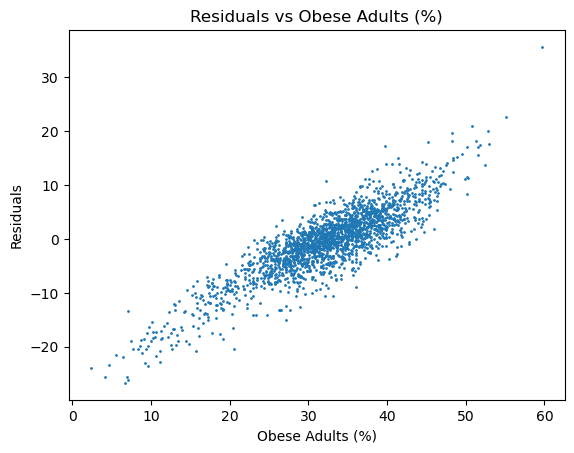

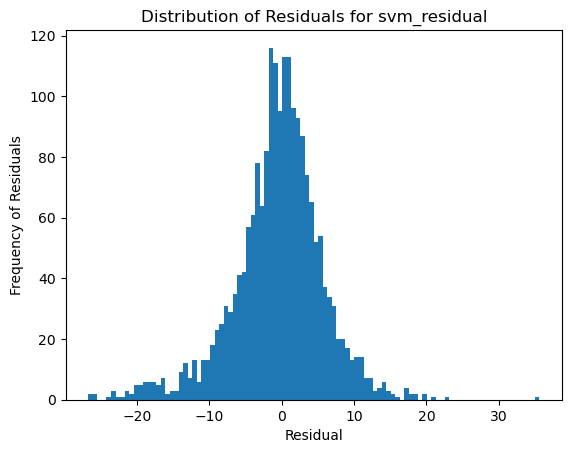

In [346]:
# Calculate the residuals
gradDf["svm_residual"] = y_test - svmReg.predict(x_test)

# Plot the residuals
plotRes(gradDf, "Obese Adults (%)", "svm_residual")

The residuals plot for the SVR model looks similar to our last two models, centered around 0 with a normal distribution. We will definitely need to employ some loss functions to tell which models actually are the best fits.

### Loss Functions
We will now use 2 different loss functions to analyze the models and attempt to quantify how well they fit the data. As we are using a large data set that seems to have several outliers, we will not be using mean squared error, since it can suffer from the influence of outliers. Instead, we will use mean absolute error, which minimizes the influence of outliers and has the additional benefit of each number being easily interpreted by humans, since it is simply the average amount that our model is wrong by. We will also be using mean squared logarithmic error, which essentially uses logarithms when computing the difference for each value, and then squares that difference. This loss function is even better for reducing the influence of outliers.
If you want to know the details of mean squared logarithmic error, you can visit: https://insideaiml.com/blog/MeanSquared-Logarithmic-Error-Loss-1035
If you want to just know more about loss functions in general, visit: https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

In [347]:
print("Ordinary least squares linear regression absolute mean error:", np.abs(resDf["lin_reg_residual"]).mean())
print("Gradient descent mean absolute error:", np.abs(gradDf["grad_residual"]).mean())
print("SVM regression mean absolute error:", np.abs(gradDf["svm_residual"]).mean())

print("--------------- Mean squared logarithmic errors --------------")
print("Ordinary least squares mean squared logarithmic error: ", 
      mean_squared_log_error(resDf["Obese Adults (%)"], multiReg.predict(resDf[pltLst])))
print("Gradient descent mean squared logarithmic error: ", 
      mean_squared_log_error(y_test, gradReg.predict(add_constant(x_test))))
print("SVM Regression mean squared logarithmic error: ", 
      mean_squared_log_error(y_test, svmReg.predict(x_test)))

Ordinary least squares linear regression absolute mean error: 4.341847469579944
Gradient descent mean absolute error: 6.353192774073313
SVM regression mean absolute error: 4.561723427908051
--------------- Mean squared logarithmic errors --------------
Ordinary least squares mean squared logarithmic error:  0.05072196836117138
Gradient descent mean squared logarithmic error:  0.0752467233133031
SVM Regression mean squared logarithmic error:  0.059898706989365606


As the residuals showed us, all of the models have similar errors. However, they are still different. We can see that our original OLS model had the least absolute mean error and mean squared logarithmic error, svm coming in a close second for both. Gradient descent was a bit of a worse fit for the data. However, it seems that any one of these could be used when the other methods are not available, as all of their errors are somewhat low. As such, we will be observing all 3 models' predictions in the next section, as one of the models may have a sort of insight into the data that the other two missed that may be worth thinking about.

### Predictions
This is the fun part! Here's where our models will actually come into use to give us some new information! If we think back to our original goals, we can remember that we were hoping to see how obesity rates might look in the future if nothing else changes. Nothing else changing would be quite an assumption, but the main goal here is to see if there are other factors at play that were simply captured by the Year variable. Thus, we will start by trying to predict the obesity rates of 10 years from where our dataframe is (2017 -> 2027, 2019 -> 2029, etc).

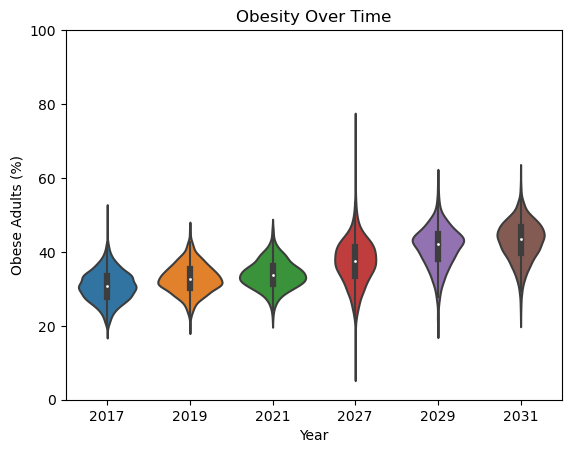

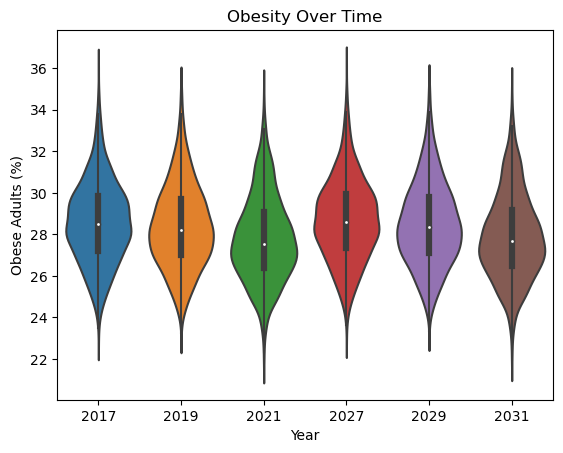

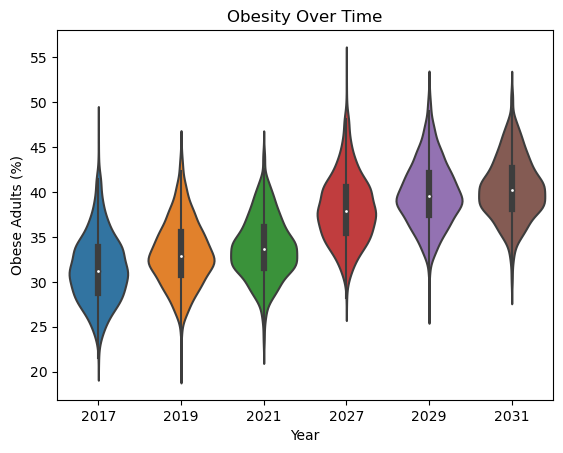

In [348]:
# For simplicity, we will only look at the possible future values for rows that have no NaN values, 
# which is why we use gradDf

# Since we will be changing this dataframe, let's make a copy
futureDf = gradDf.copy() 

# Add 10 to the year column
futureDf["Year"] = futureDf["Year"] + 10

# Add our future dataframe to the present dataframe so we can directly compare the two
extendedDf = pd.concat([gradDf, futureDf])
x = extendedDf[pltLst]

# Predict obesity rates using our OLS regression and create a violin plot over time with the results
extendedDf["ols_pred_obesity"] = multiReg.predict(x)
sns.violinplot(x=extendedDf["Year"], y=extendedDf["ols_pred_obesity"]).set(title="Obesity Over Time", 
                                                          xlabel="Year", 
                                                          ylabel="Obese Adults (%)")
plt.ylim(0, 100)
plt.show()

# Predict obesity rates using our gradient descent regression and create a violin plot over time with the results
extendedDf["grad_pred_obesity"] = gradReg.predict(add_constant(x))
sns.violinplot(x=extendedDf["Year"], y=extendedDf["grad_pred_obesity"]).set(title="Obesity Over Time", 
                                                          xlabel="Year", 
                                                          ylabel="Obese Adults (%)")
plt.show()

# Predict obesity rates using our SVD regression and create a violin plot over time with the results
extendedDf["svm_pred_obesity"] = svmReg.predict(x)
sns.violinplot(x=extendedDf["Year"], y=extendedDf["svm_pred_obesity"]).set(title="Obesity Over Time", 
                                                          xlabel="Year", 
                                                          ylabel="Obese Adults (%)")
plt.show()

The OLS and SVR regressions both predicted that, even if none of the other variables that we are measuring change, the rate of obesity will increase over the next 10 years, and by a fairly significant amount (around 5% from just eyeballing the plots). These indicate some urgency in trying to change what we can, as some other variables, like the availability and health level of foods, may affect the population if we wait too long. Interestingly, though, the gradient descent model indicated that if the variables other than Year remain the same, then so will the obesity rate. Essentially it's saying that if things are the same as they are now, as far as consumption of fruit/vegetable rates and physical activity rates, then obesity rates will stop increasing. I believe this is a noteworthy insight, as it basically says that we have an opportunity to create a change in obesity rates if we can somehow lower the proportion of the population that performs no physical activity or doesn't eat fruits/vegetables often.
In our next section of predictions, we will try to see what would happen to the obesity rate in America if we did manage to get more of the population eating fruits/vegetables or performing physical activity. Specifically, we will ask what would happen if physical activity remained constant and the proportion of adults that report consuming fruits/vegetables is decreased by 10 from 2021 to 2025.

Actual for 2021: 33.0
Predictions:
OLS Prediction for 2025: 27.574625525061037
Gradient Descent Prediction for 2025: 28.302871503623166
SVM Prediction for 2025: 35.149834754230824


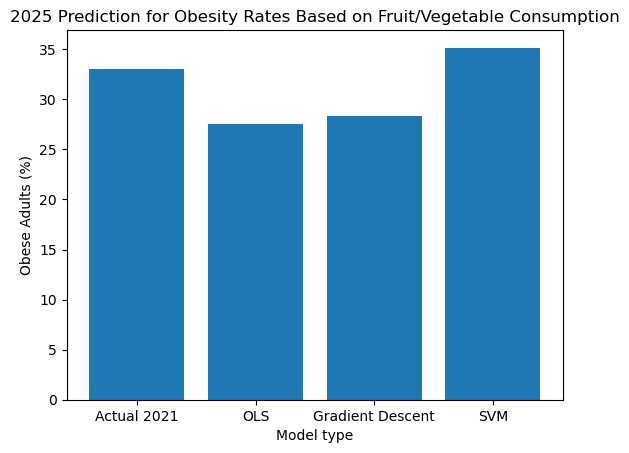

In [349]:
# Filter the dataframe to only have columns for america in 2021
america2021Df = df2.loc[lambda row: (row["LocationAbbr"] == "US") & (row["LocationDesc"] == "National") & 
                        (row["Year"] == 2021)]

# We are looking for a concrete value, so let's look at only the percentages for the total population
america2021Df = america2021Df[america2021Df["Stratification"] == "Total"]

# We can now also only have the columns that our models need
america2021Df = america2021Df

# Let's create a copy to do this experiment on (because we will do another experiment on 2021 America)
fruitVegeDf = america2021Df[pltLst].copy()
fruitVegeDf["Year"] = 2025
fruitVegeDf["Adults that report consuming fruit <1 time/day (%)"] -= 10
fruitVegeDf["Adults that report consuming vegetable <1 time/day (%)"] -= 10

# Add a 1 to the row for the gradient descent
const_x = fruitVegeDf.copy()
const_x["const"] = 1
const_x = const_x[["const"] + pltLst]

# Get the actual value
actual2021 = america2021Df["Obese Adults (%)"].iloc[0]

# Get the predictions
mrFruitPred = multiReg.predict(fruitVegeDf).iloc[0] # OLS
grFruitPred = gradReg.predict(const_x)[0] # Gradient Descent
svmFruitPred = svmReg.predict(fruitVegeDf)[0] # SVR

print("Actual for 2021:", actual2021)
print("Predictions:")
print("OLS Prediction for 2025:", mrFruitPred)
print("Gradient Descent Prediction for 2025:", grFruitPred)
print("SVM Prediction for 2025:", svmFruitPred)

# Create a bar plot of the predictions compared with the actual value from 2021 for easy visual comparison
plt.bar([1, 2, 3, 4], [actual2021, mrFruitPred, grFruitPred, svmFruitPred], 
        tick_label=["Actual 2021", "OLS", "Gradient Descent", "SVM"])
plt.xlabel("Model type")
plt.ylabel("Obese Adults (%)")
plt.title("2025 Prediction for Obesity Rates Based on Fruit/Vegetable Consumption")
plt.show()

There are mixed "opinions" among our models. It is noteworthy, though, that both OLS and SVR thought that even if nothing changed, the obesity rate would rise, so it is significant that the SVR prediction was not much greater than the 2021 prediction, as it shows a good change. On the other hand, the other two models' predictions are much more clear in indicating the benefit of increasing fruit/vegetable consumption in America, as both dropped by fairly significant amounts. It is especially impressive how low the OLS prediction is, considering it was one of the models that thought that obesity would rise over time even without changes. Essentially, according to the models, it seems that decreasing the proportion of adults that consume <1 fruits/vegetables per day by just 10% from 2021 to 2025 could be a fairly significant accomplishment and may have a very nice effect on obesity rates.

We will now ask what would be the obesity rate if the proportion of inactive people in America decreased by 15% from 2021 to 2025.

Actual for 2021: 33.0
Predictions:
OLS Prediction for 2025: 32.958473452717044
Gradient Descent Prediction for 2025: 28.302871503623166
SVM Prediction for 2025: 29.800156655075398


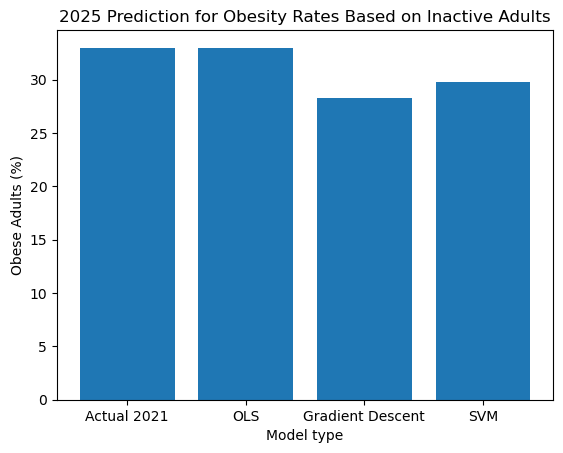

In [350]:
# Let's create another copy to do this experiment on
inactiveDf = america2021Df[pltLst].copy()
inactiveDf["Year"] = 2025
inactiveDf["Adults that perform no physical activity (%)"] -= 15
inactiveDf

# Add a 1 to the row for the gradient descent
const_x = fruitVegeDf.copy()
const_x["const"] = 1
const_x = const_x[["const"] + pltLst]

# Create predictions
mrInactivePred = multiReg.predict(inactiveDf).iloc[0] # OLS
grInactivePred = gradReg.predict(const_x)[0] # Gradient descent
svmInactivePred = svmReg.predict(inactiveDf)[0] # SVR

print("Actual for 2021:", actual2021)
print("Predictions:")
print("OLS Prediction for 2025:", mrInactivePred)
print("Gradient Descent Prediction for 2025:", grInactivePred)
print("SVM Prediction for 2025:", svmInactivePred)

# Create a bar plot of the actual 2021 value and the predictions
plt.bar([1, 2, 3, 4], [actual2021, mrInactivePred, grInactivePred, svmInactivePred], 
        tick_label=["Actual 2021", "OLS", "Gradient Descent", "SVM"])
plt.xlabel("Model type")
plt.ylabel("Obese Adults (%)")
plt.title("2025 Prediction for Obesity Rates Based on Inactive Adults")
plt.show()

This time, the differences were not by quite as much. This could be partially because in our last prediction, we changed two of the variables, while in this one, we only changed one. Regardless, every model said that if the proportion of Americans that perform no physical activity decreased by 15% from 2021 to 2025, the obesity rate would be lower, which is still an accomplishment. Essentially, America should aim to increase the number of active people in its population, and, according to our models, the obesity rate could decrease.

# Insight & Policy Decision
In this section, we will take what the machine learning models and plots have shown us and create general inferences off of them, and consider what should be done and what realistically could be done if we want the obesity rate to decrease. The main takeaways are that, according to our models, we could start reducing the proportion of obese people around the world if we just find a way to get people to eat more fruits/vegetables and being physically active. Of course, this is much easier said than done, but our models have confirmed that it could have good results.
Additionally, if we can't manage to get more people living healthier lifestyles, then the proportion of people with obesity could only increase as an effect of other factors.
Speaking of other factors, recall that, while we did not create models for them, we plotted obesity as a function of various demographic information. The significant differences between the demographic groups show that there is more to be done outside of attempting to influence individual's decision making. For example, there is apparently something about being a college graduate that makes one less likely to be obese, and lower income generally means a higher percentage of obese people. These are beyond the scope of this insight, but are certainly worth being inspected further.
There are some policies that could be adopted by countries like the United States to attempt to change our variables, though it would be very difficult to find exactly what would create a drastic change. An example of said policies is using taxes to influence consumer food choice. For more information about taxes on food to influence consumer choice, you can read this plos medicine article: https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002597

If you're now interested in learning more about obesity and its causes, there are a wide variety of studies out there on the internet and government websites that teach you about the topic. A couple of organizations to check out are the CDC and FDA. 

All in all, obesity is an issue that is getting worse over time, and if we don't do anything about it, then it could continue to get worse. The good news is that there are things that a population can do to lower its obesity rate, even fighting against other variables that we couldn't analyze that affect obesity as time progresses.